In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [429]:
########## SQ strategy

In [430]:
SQ = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', low_memory=False)

In [431]:
#grouped_trips

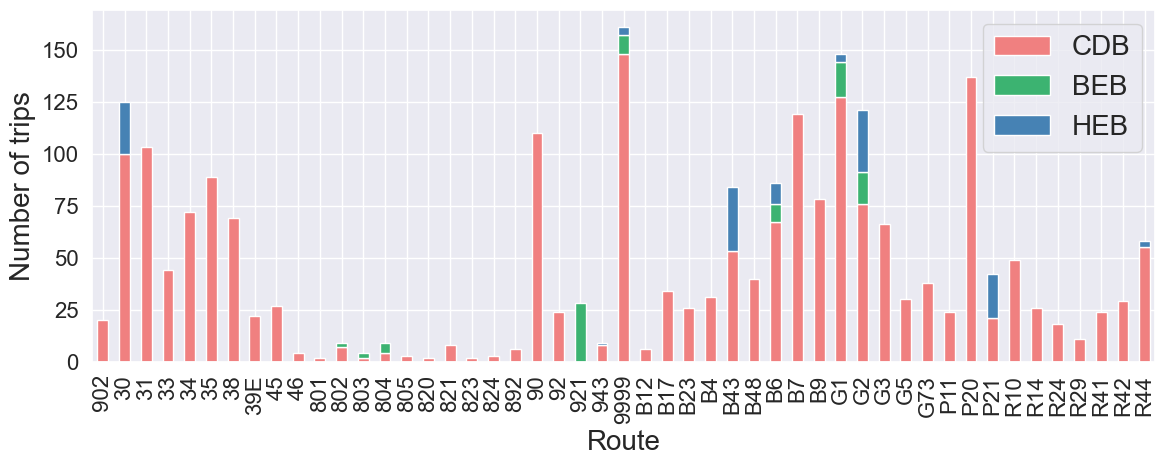

In [612]:
# Filter the dataframe for date 2021-10-29
SQ_filtered = SQ.loc[SQ['Date']=='2021-10-29'].copy()

# Remove X and (X) from routes names
SQ_filtered['Route'] = SQ_filtered['Route'].str.replace(r'\(X\)', '', regex=True) # replace (X)
SQ_filtered['Route'] = SQ_filtered['Route'].str.replace('X', '', regex=False) # replace X

# Group by Route and Powertrain to count unique trips
grouped_trips = SQ_filtered.groupby(['Route', 'Powertrain'])['Trip'].nunique().unstack(fill_value=0)

# Rename columns
grouped_trips = grouped_trips.rename(columns={
    'conventional': 'CDB',
    'hybrid': 'HEB',
    'electric': 'BEB'
})


# Plot
# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(12, 5))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_trips.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_trips.columns], ax=ax)

# Annotate with BEB percentages
for index, (route, row) in enumerate(grouped_trips.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Number of trips', fontsize=20)
ax.legend(fontsize=20)
#ax.set_xlabel('')
#ax.set_xticks([])
# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()

fig.savefig(r'../../figures/SQ_route_electrification.png', dpi=400)  

plt.show()


In [613]:
# Compute the total BEB counts and total trips
total_BEB_counts = grouped_trips['BEB'].sum()
total_trips = grouped_trips.sum(axis=1).sum()

# Calculate average %BEB across all routes
average_percentage_BEB = (total_BEB_counts / total_trips) * 100

print(f"Average %BEB across all routes: {average_percentage_BEB:.2f}%")


Average %BEB across all routes: 3.82%


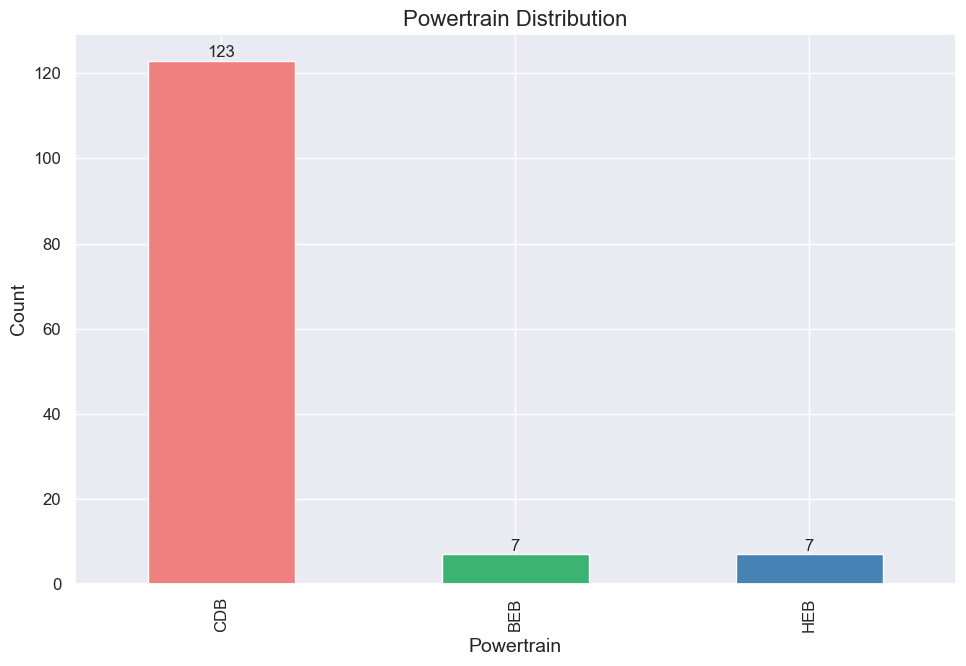

In [614]:
# Drop duplicate Vehicles while retaining the associated Powertrain
unique_vehicles = SQ_filtered.drop_duplicates(subset='Vehicle', keep='first')

# Count occurrences of each Powertrain
powertrain_counts = unique_vehicles['Powertrain'].value_counts()

# Define colors
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue', 'electric': 'mediumseagreen'}

# Create a larger plot with increased font size
plt.figure(figsize=(10,7))
ax = powertrain_counts.plot(kind='bar', color=[colors[p] for p in powertrain_counts.index])

# Annotate bars with their count
for i, v in enumerate(powertrain_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

# Labels, title, and formatting
plt.xlabel('Powertrain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Powertrain Distribution', fontsize=16)
labels = {'conventional': 'CDB', 'hybrid': 'HEB', 'electric': 'BEB'}
plt.xticks(range(len(powertrain_counts.index)), [labels[p] for p in powertrain_counts.index], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [615]:
# Calculate sum for each Year for each DataFrame
#h_FH_variables['Result'] = h_FH_variables['Value'] * h_FH_variables['Coefficient']
#h_FH_sum = h_FH_variables.groupby('Year')['Result'].sum().reset_index()

#m_FH_variables['Result'] = m_FH_variables['Value'] * m_FH_variables['Coefficient']
#m_FH_sum = m_FH_variables.groupby('Year')['Result'].sum().reset_index()

#l_FH_variables['Result'] = l_FH_variables['Value'] * l_FH_variables['Coefficient']
#l_FH_sum = l_FH_variables.groupby('Year')['Result'].sum().reset_index()

# Add Scenario and Strategy columns
#h_FH_sum['Scenario'] = 'h'
#h_FH_sum['Strategy'] = 'FH'

#m_FH_sum['Scenario'] = 'm'
#m_FH_sum['Strategy'] = 'FH'

#l_FH_sum['Scenario'] = 'l'
#l_FH_sum['Strategy'] = 'FH'

# Concatenate the DataFrames
#final_df = pd.concat([h_FH_sum, m_FH_sum, l_FH_sum])

# Rearrange the columns
#final_df = final_df[['Year', 'Result', 'Scenario', 'Strategy']]
#final_df.to_csv(r'../../results/diesel-FH.csv', index=False)

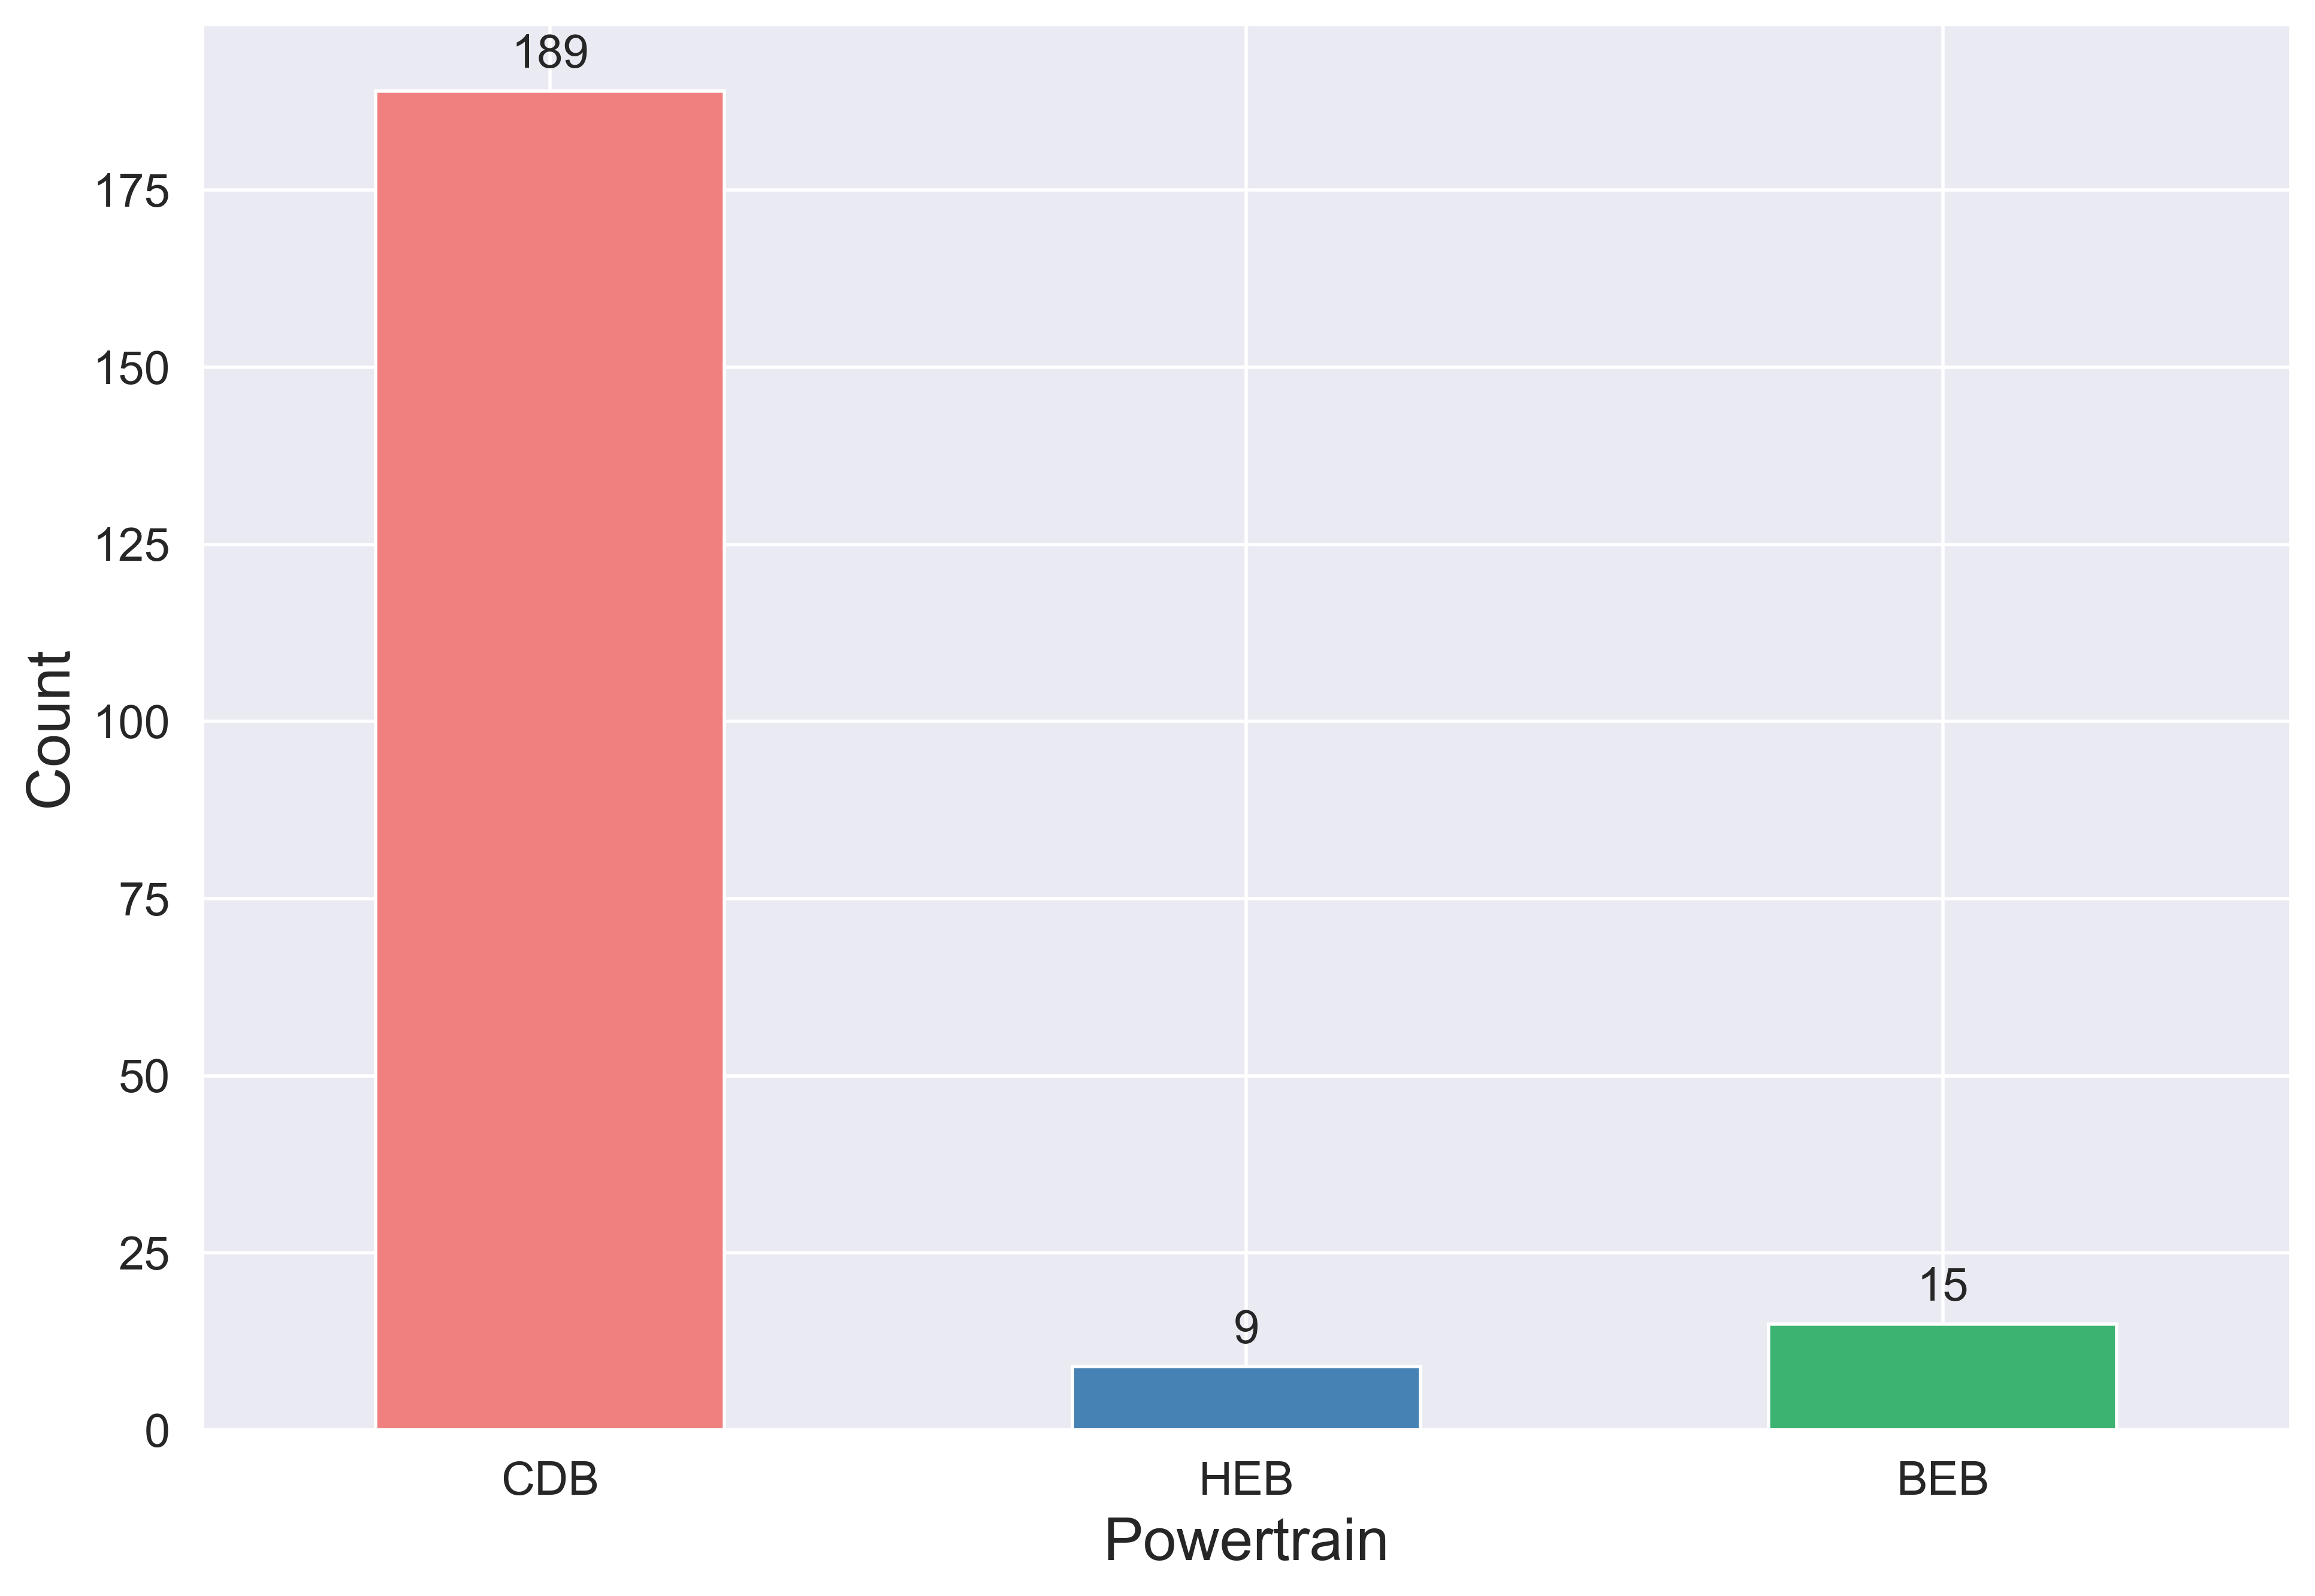

In [616]:
# Define counts and their labels
powertrain_counts = pd.Series({'conventional': 189, 'hybrid': 9, 'electric': 15})

# Define colors
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue', 'electric': 'mediumseagreen'}

# Create a larger plot with increased font size
plt.figure(figsize=(10,7), dpi=400)
ax = powertrain_counts.plot(kind='bar', color=[colors[p] for p in powertrain_counts.index])

# Annotate bars with their count
for i, v in enumerate(powertrain_counts):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=14)  # increased y-value a bit for better placement

# Labels, title, and formatting
plt.xlabel('Powertrain', fontsize=18)
plt.ylabel('Count', fontsize=18)
#plt.title('Powertrain Distribution', fontsize=22)
labels = {'conventional': 'CDB', 'hybrid': 'HEB', 'electric': 'BEB'}
plt.xticks(range(len(powertrain_counts.index)), [labels[p] for p in powertrain_counts.index], fontsize=14, rotation=0)  # set rotation to 0
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(r'../../figures/fleet.png', dpi=400)  

plt.show()

In [684]:
# Create the 'Result' column in SQ dataframe
SQ['Result'] = SQ['Energy']
SQ.loc[SQ['Powertrain'] == 'electric', 'Result'] = 0
SQ_busiest = SQ.loc[SQ['Date']=='2021-10-29'].copy()


# Create the final_df dataframe
# Start by summing the Result values
total_result = SQ_busiest['Result'].sum()

# Create the dataframe with 'Year' values ranging from 0 to 12
df_SQ = pd.DataFrame({'Year': range(13)})

# Fill the other columns
df_SQ['Result'] = total_result
df_SQ['Scenario'] = 'c'
df_SQ['Strategy'] = 'SQ'

In [687]:
SQ_busiest['Result'].sum()

3754.3190736247534

In [618]:
# Group by Route and Powertrain to count unique trips
trips = SQ_filtered.groupby(['Powertrain'])['dist'].sum()

In [619]:
trips

Powertrain
conventional    11386.146799
electric          382.512323
hybrid            772.229864
Name: dist, dtype: float64

In [620]:
11386.146799/(11386.146799+382.512323+772.229864)

0.9079218237009278

In [621]:
382.512323/(11386.146799+382.512323+772.229864)

0.030501212747119994

In [622]:
772.229864/(11386.146799+382.512323+772.229864)

0.06157696355195213

In [623]:
11386.146799+382.512323+772.229864

12540.888986000002

In [708]:
df_SQ_diesel=pd.read_csv(r'../../results/diesel-SQ.csv', low_memory=False)

In [709]:
df_BM = pd.read_csv(r'../../results/diesel-BM.csv', low_memory=False)

In [710]:
df_FE = pd.read_csv(r'../../results/diesel-FE.csv', low_memory=False)

In [711]:
df_FH = pd.read_csv(r'../../results/diesel-FH.csv', low_memory=False)

In [712]:
df_PP = pd.read_csv(r'../../results/diesel-PP.csv', low_memory=False)

In [713]:
# List of dataframes to concatenate
dfs = [df_SQ_diesel, df_PP, df_FH, df_FE, df_BM]

# Concatenate the dataframes
final_df = pd.concat(dfs, ignore_index=True)

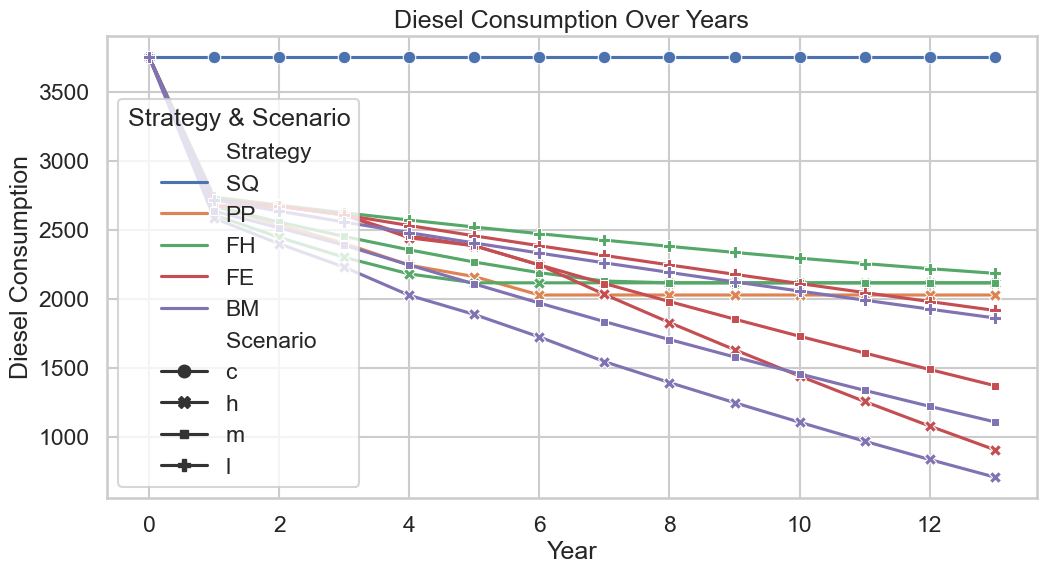

In [714]:
# Ensure that the data types are appropriate for plotting
final_df['Year'] = final_df['Year'].astype(int)
final_df['Result'] = final_df['Result'].astype(float)

# Create the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='Year', y='Result', hue='Strategy', style='Scenario', markers=True, dashes=False)

# Add titles and labels
plt.title('Diesel Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Diesel Consumption')
plt.legend(title='Strategy & Scenario')

# Display the plot
plt.show()


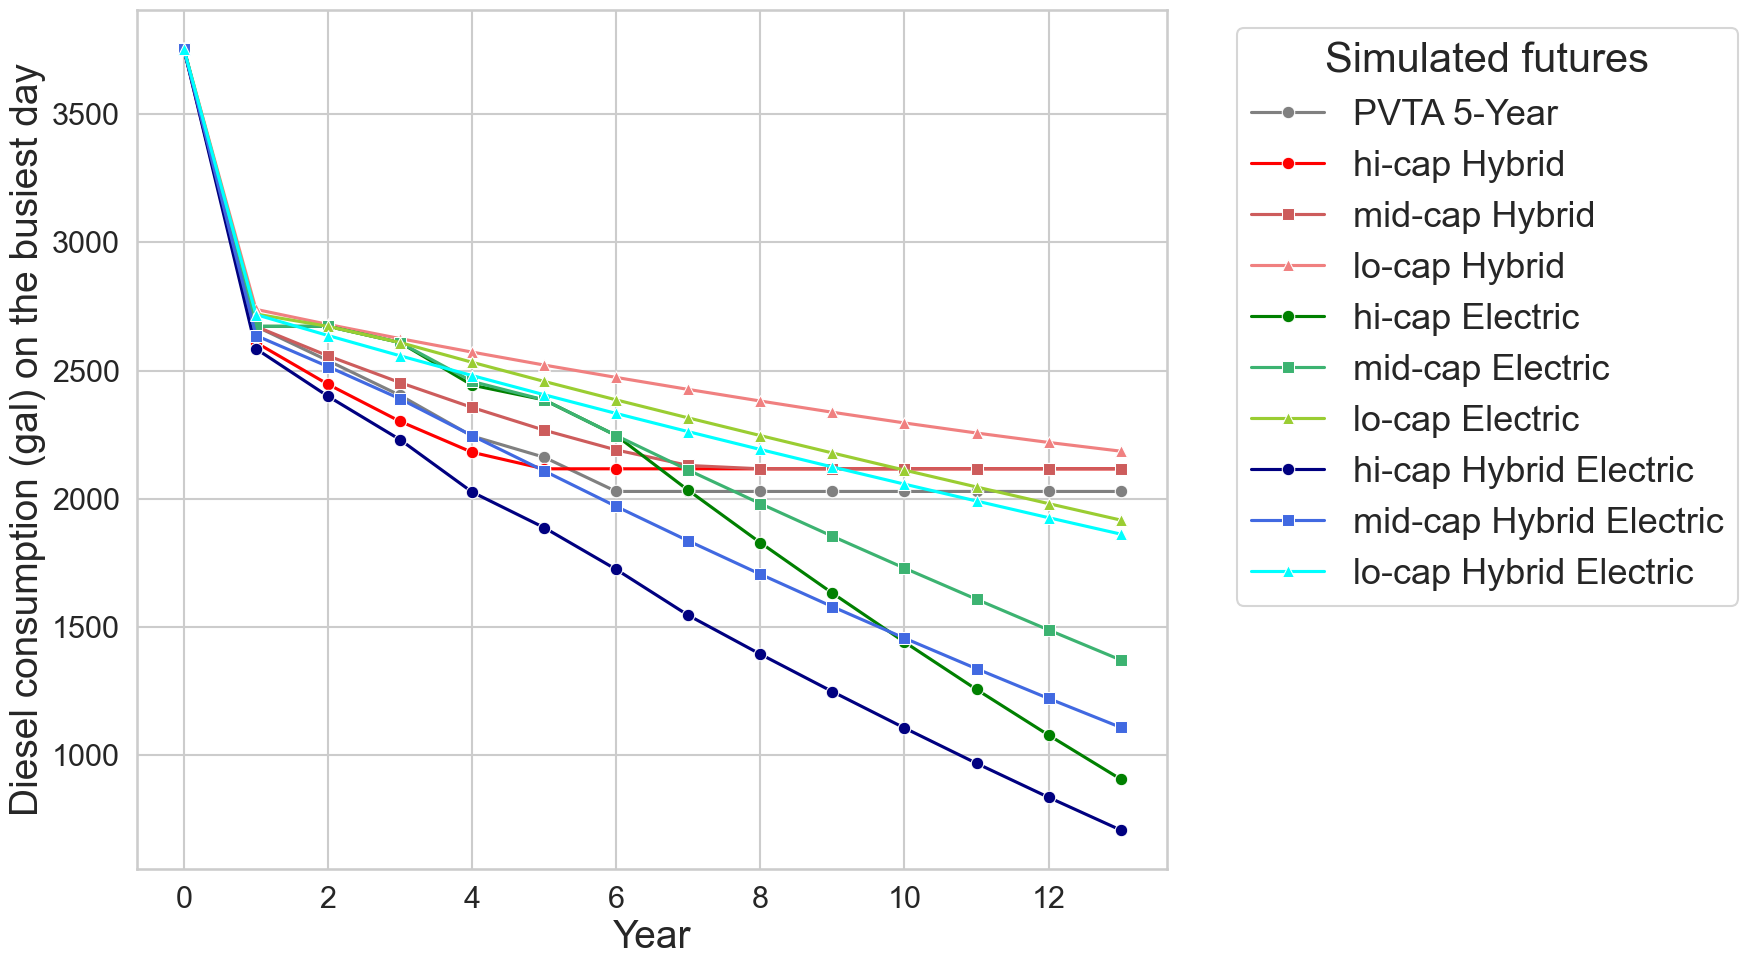

In [728]:
# Mapping combinations to desired names
mapping = {
    ('c', 'SQ'): 'Do-Nothing',
    ('h', 'PP'): 'PVTA 5-Year',
    ('l', 'FH'): 'lo-cap Hybrid',
    ('m', 'FH'): 'mid-cap Hybrid',
    ('h', 'FH'): 'hi-cap Hybrid',
    ('l', 'FE'): 'lo-cap Electric',
    ('m', 'FE'): 'mid-cap Electric',
    ('h', 'FE'): 'hi-cap Electric',
    ('l', 'BM'): 'lo-cap Hybrid Electric',
    ('m', 'BM'): 'mid-cap Hybrid Electric',
    ('h', 'BM'): 'hi-cap Hybrid Electric'
}




final_df['Label'] = final_df.set_index(['Scenario', 'Strategy']).index.map(mapping.get).values
unique_labels = final_df['Label'].unique()

# Improve the plot
sns.set_style("whitegrid")
sns.set_context("talk")  # makes everything larger

# Create a color palette
#palette = sns.color_palette('tab10', n_colors=len(unique_labels))

# Define a custom palette and marker order
custom_palette = {
    "Do-Nothing": "black",
    "PVTA 5-Year": "grey",
    "lo-cap Hybrid": "lightcoral",
    "mid-cap Hybrid": "indianred",
    "hi-cap Hybrid": "red",
    "lo-cap Hybrid Electric": "aqua",
    "mid-cap Hybrid Electric": "royalblue",
    "hi-cap Hybrid Electric": "navy",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}
custom_markers = {
    "Do-Nothing": "P",
    "PVTA 5-Year": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}

plt.figure(figsize=(18, 10))

# Use a loop to plot each category with its unique marker and color
for label in unique_labels:
    subset = final_df[final_df['Label'] == label]
    sns.lineplot(data=subset, x='Year', y='Result', label=label, dashes=False, 
                 color=custom_palette[label], marker=custom_markers[label])

# Add titles and labels
#plt.title('Diesel Consumption Over Years', fontsize=20)
plt.xlabel('Year', fontsize=28)
plt.ylabel('Diesel consumption (gal) on the busiest day', fontsize=28)
plt.legend(title='Simulated futures', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=26, title_fontsize=30)
#plt.legend(handles=plot.get_lines(), labels=unique_labels, title='Configurations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Save the plot
plt.tight_layout()
plt.savefig(r'../../figures/diesel-consumption.png', dpi=400)

# Display the plot
plt.show()


In [716]:
final_df['CO2']=final_df['Result']*9.841/1000 # /1000 to convert it to ton

In [717]:
# Group by 'Label' and sum 'Result'
summed_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Find the sum of 'Result' for 'Do-nothing' label
do_nothing_value = summed_results[summed_results['Label'] == 'Do-Nothing']['Result'].values[0]

# Compute % decrease relative to 'Do-nothing'
summed_results['% Decrease'] = 100 * (do_nothing_value - summed_results['Result']) / do_nothing_value

summed_results

Label        Result  % Decrease
0                Do-Nothing  52560.467036    0.000000
1               PVTA 5-Year  32003.393946   39.111283
2           hi-cap Electric  28958.813153   44.903813
3             hi-cap Hybrid  32344.353744   38.462583
4    hi-cap Hybrid Electric  24410.248312   53.557779
5           lo-cap Electric  33928.729195   35.448197
6             lo-cap Hybrid  35467.706450   32.520184
7    lo-cap Hybrid Electric  33300.511085   36.643426
8          mid-cap Electric  30941.671179   41.131286
9            mid-cap Hybrid  33081.549917   37.060015
10  mid-cap Hybrid Electric  27863.742789   46.987262

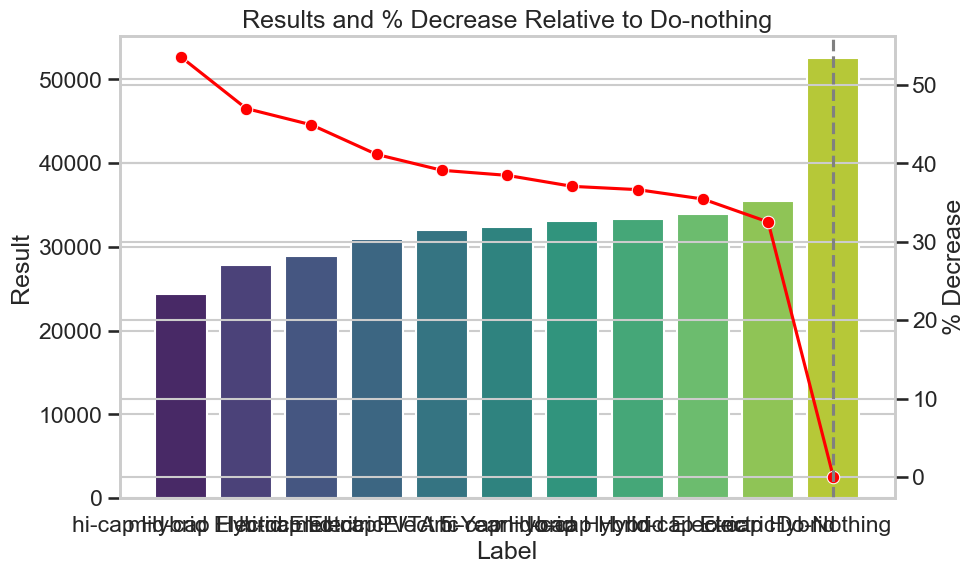

In [718]:
# Group by 'Label' and sum 'Result'
summed_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = summed_results[summed_results['Label'] == 'Do-Nothing']['Result'].values[0]
summed_results['% Decrease'] = 100 * (do_nothing_value - summed_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
summed_results = summed_results.sort_values('Result')

# Plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x='Label', y='Result', data=summed_results, palette='viridis')

# Line plot for % Decrease
ax2 = plt.gca().twinx()
sns.lineplot(x='Label', y='% Decrease', data=summed_results, ax=ax2, color='red', marker="o")

# Highlight 'Do-nothing'
plt.axvline(x=summed_results['Label'].tolist().index('Do-Nothing'), color='grey', linestyle='--')

# Legends and titles
plt.title('Results and % Decrease Relative to Do-nothing')
plt.gca().set(ylabel='% Decrease')
plt.show()

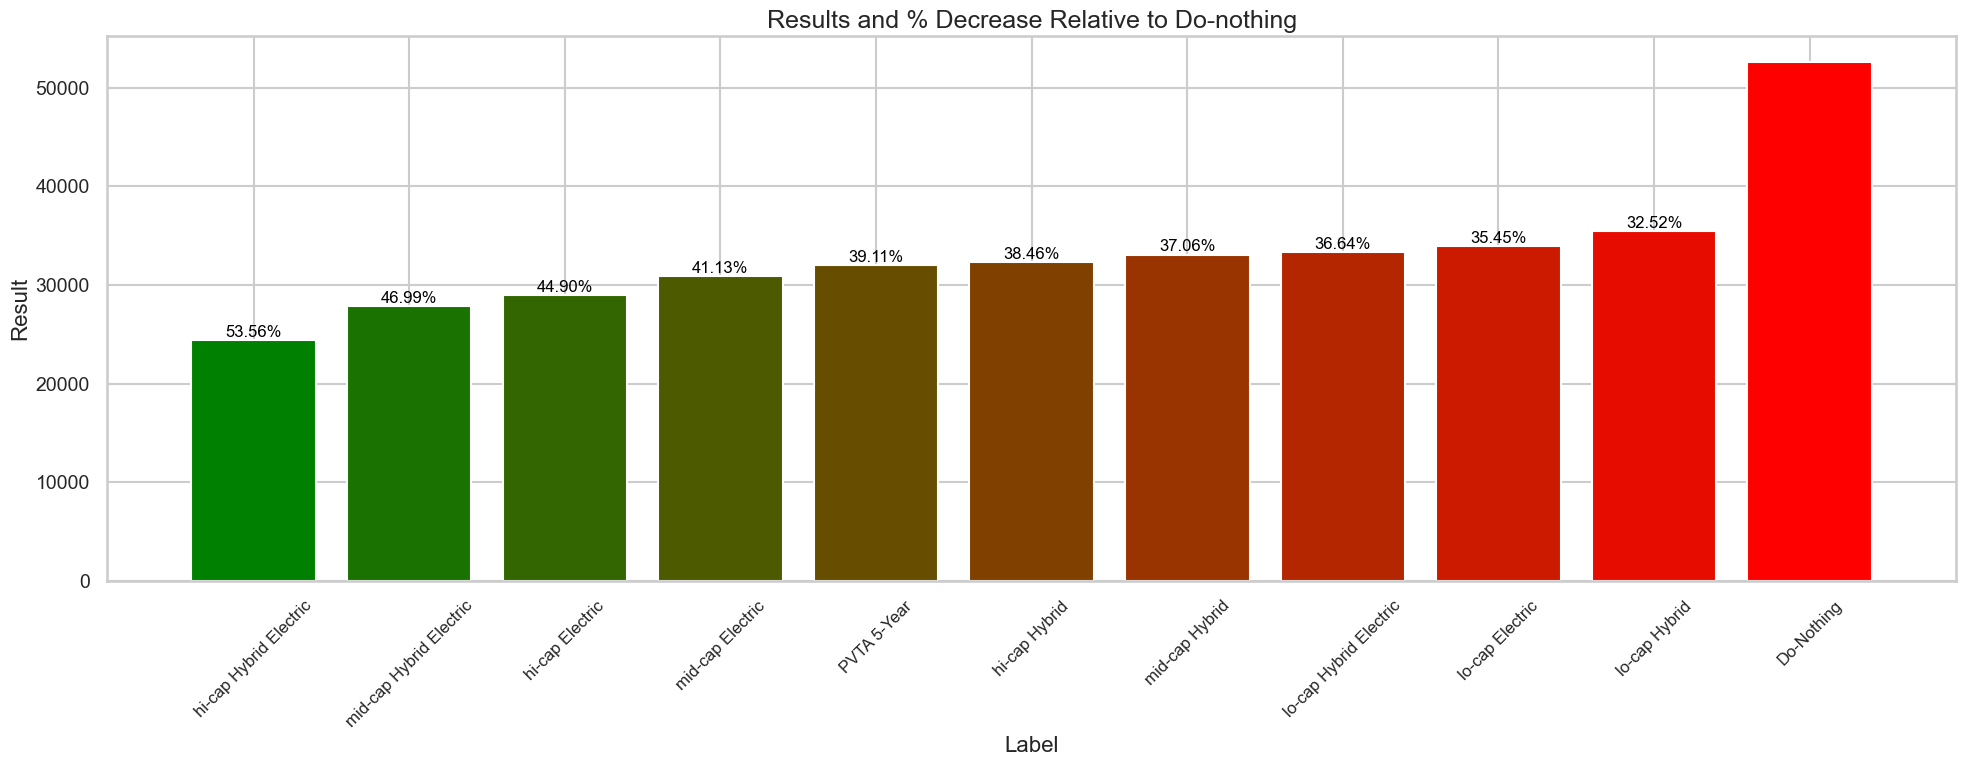

In [719]:
# Group by 'Label' and sum 'Result'
mean_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = mean_results[mean_results['Label'] == 'Do-Nothing']['Result'].values[0]
mean_results['% Decrease'] = 100 * (do_nothing_value - mean_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
mean_results = mean_results.sort_values('Result')

# Create custom colormap
colors = ["green", "red"]  # Reversed the order for proper gradient
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(mean_results))

# Derive bar colors from colormap
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(mean_results))]

# Plot
plt.figure(figsize=(20, 8))
bars = plt.bar(mean_results['Label'], mean_results['Result'], color=bar_colors)

# Annotations on top of each bar
for idx, rect in enumerate(bars):
    height = rect.get_height()
    if mean_results.iloc[idx]['Label'] != 'Do-Nothing':
        plt.annotate(f"{mean_results.iloc[idx]['% Decrease']:.2f}%",
                     xy=(rect.get_x() + rect.get_width() / 2, height + 2),  # Adding a small offset on y for clarity
                     ha='center', va='bottom', fontsize=12, color='black')

# Style adjustments
plt.xticks(fontsize=12, rotation=45)  # Increased font size and rotated ticks by 45 degrees
plt.yticks(fontsize=14)
plt.xlabel('Label', fontsize=16)
plt.ylabel('Result', fontsize=16)
plt.title('Results and % Decrease Relative to Do-nothing', fontsize=18)
plt.tight_layout()
plt.show()


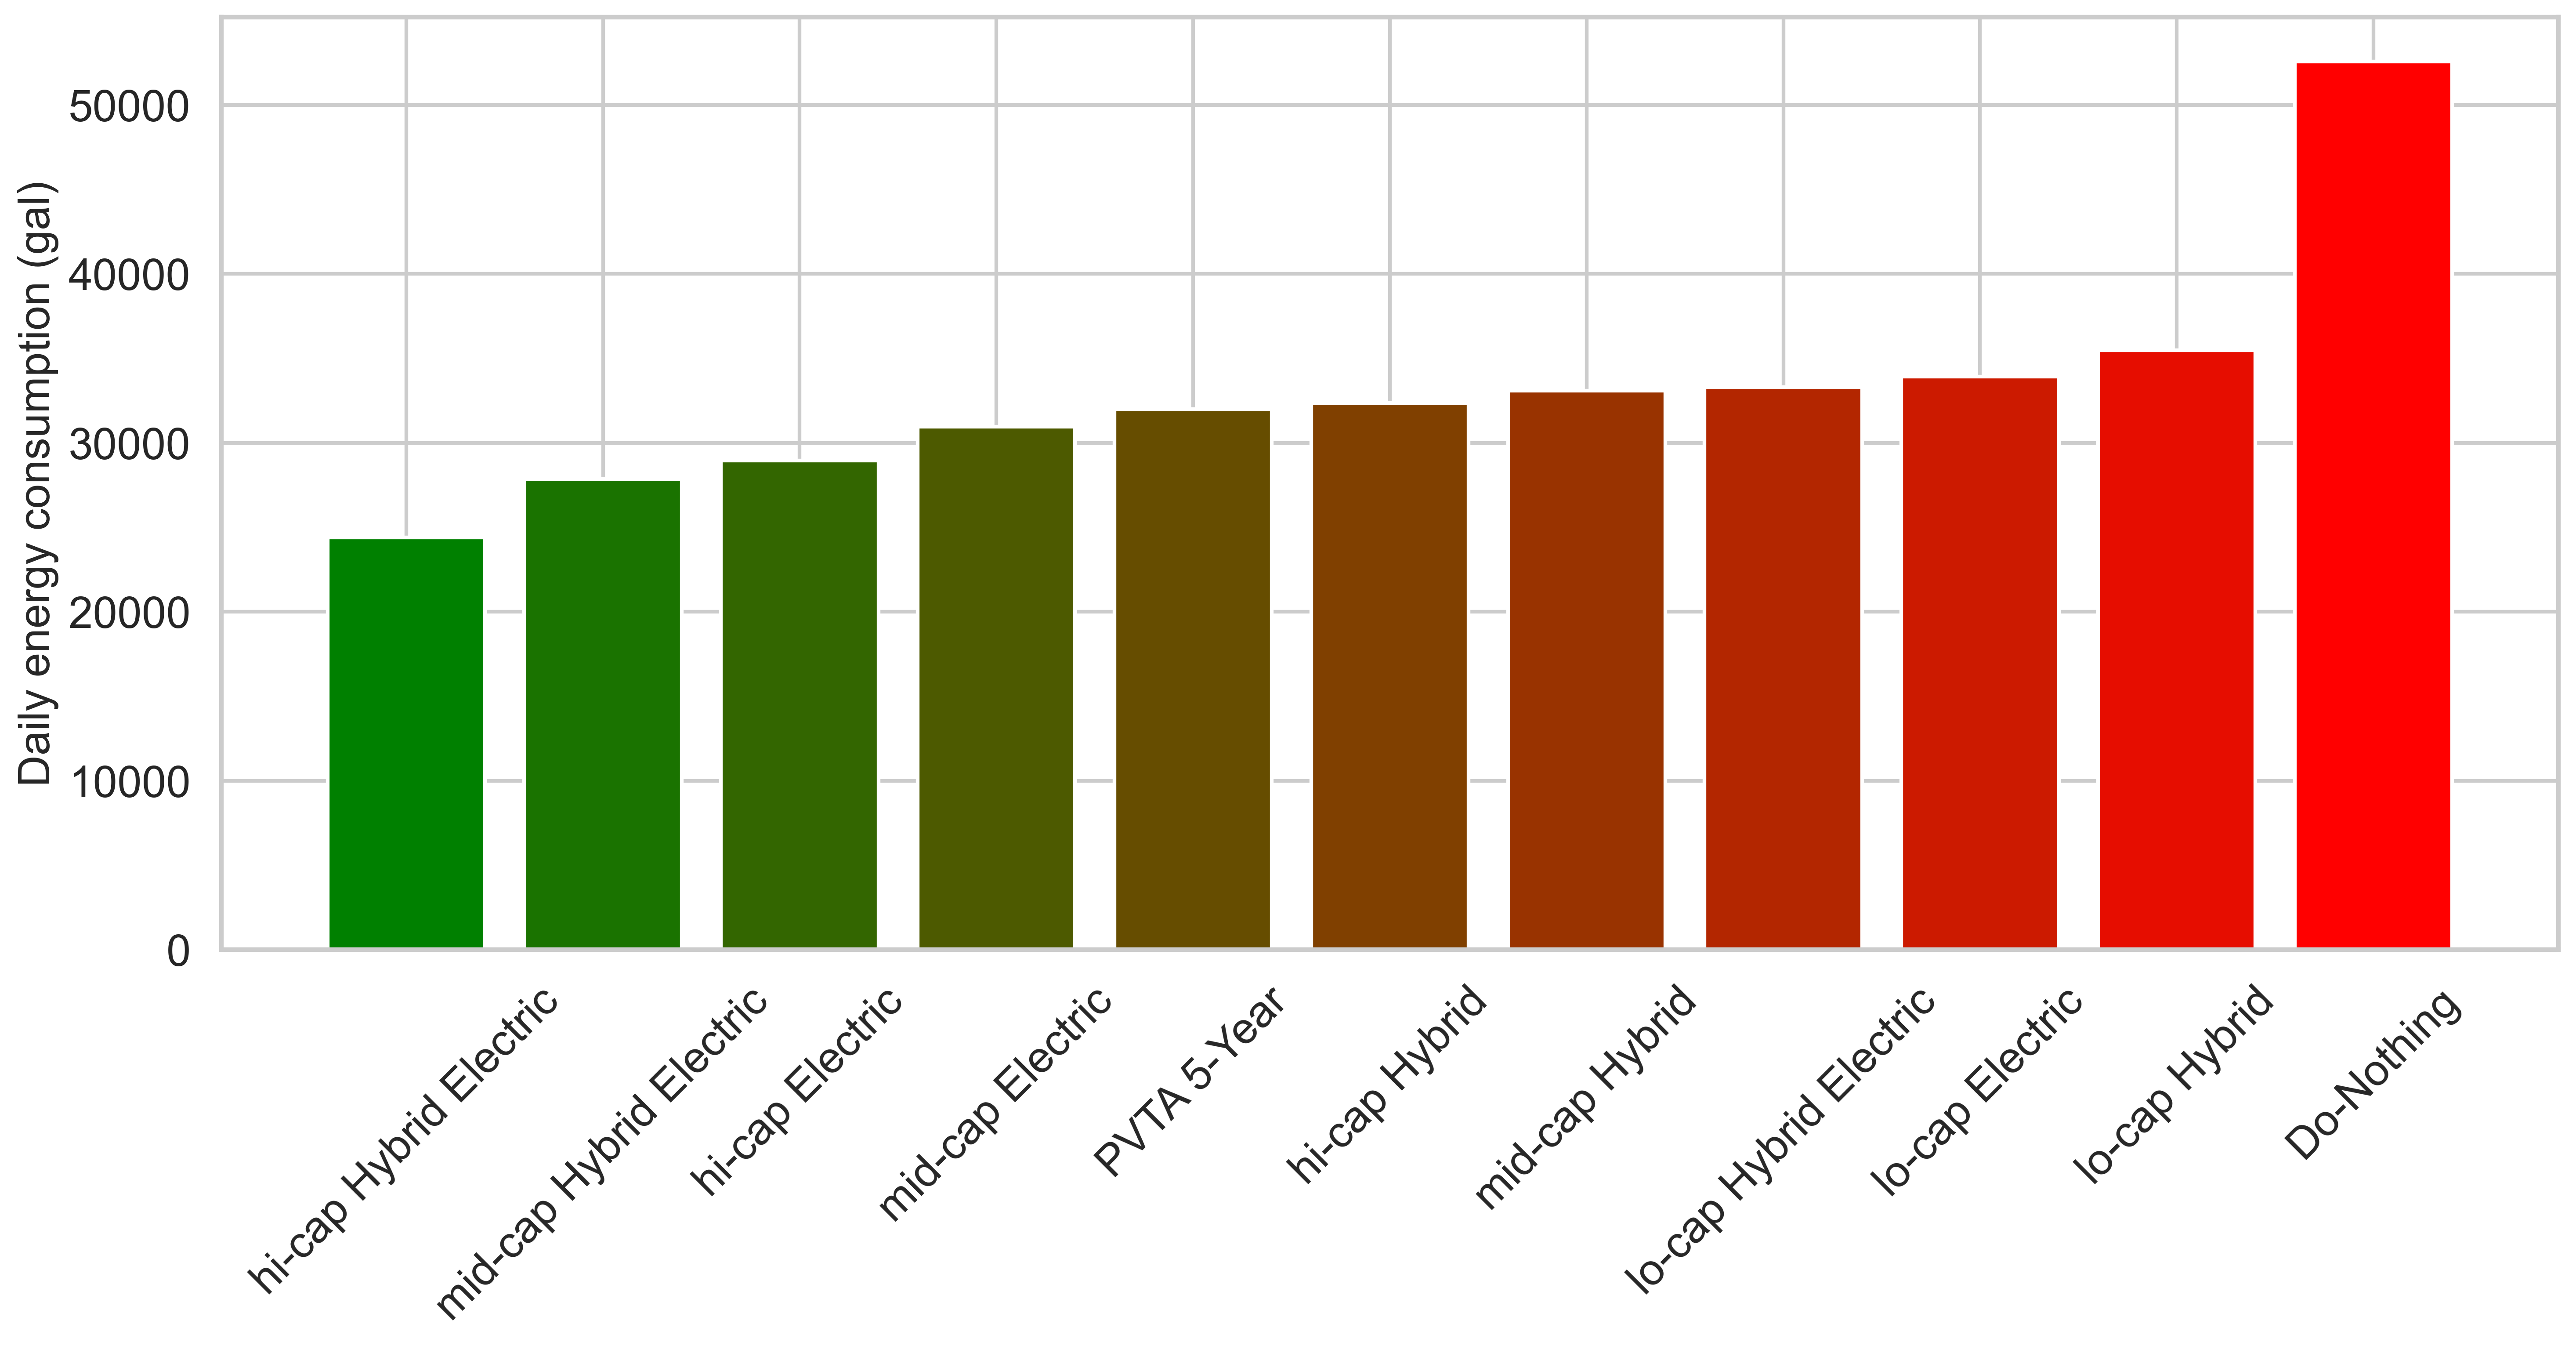

In [720]:
# Group by 'Label' and sum 'Result'
mean_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = mean_results[mean_results['Label'] == 'Do-Nothing']['Result'].values[0]
mean_results['% Decrease'] = 100 * (do_nothing_value - mean_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
mean_results = mean_results.sort_values('Result')

# Create custom colormap
colors = ["green", "red"]  # Reversed the order for proper gradient
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(mean_results))

# Derive bar colors from colormap
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(mean_results))]

# Plot
plt.figure(figsize=(15, 8), dpi=400)  # Increased size
bars = plt.bar(mean_results['Label'], mean_results['Result'], color=bar_colors)

# Style adjustments
plt.xticks(fontsize=18, rotation=45)  # Increased font size and rotated ticks by 45 degrees
plt.yticks(fontsize=18)  # Increased font size
#plt.xlabel('Label', fontsize=20)  # Increased font size
plt.ylabel('Daily energy consumption (gal)', fontsize=18)  # Increased font size
#plt.title('Results and % Decrease Relative to Do-nothing', fontsize=24)  # Increased font size
# Save the plot
plt.tight_layout()
plt.savefig(r'../../figures/mean-diesel-consumption.png', dpi=400)  
plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_35504\4029771390.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = aggregated_df.pivot('Scenario', 'Strategy', 'Result')


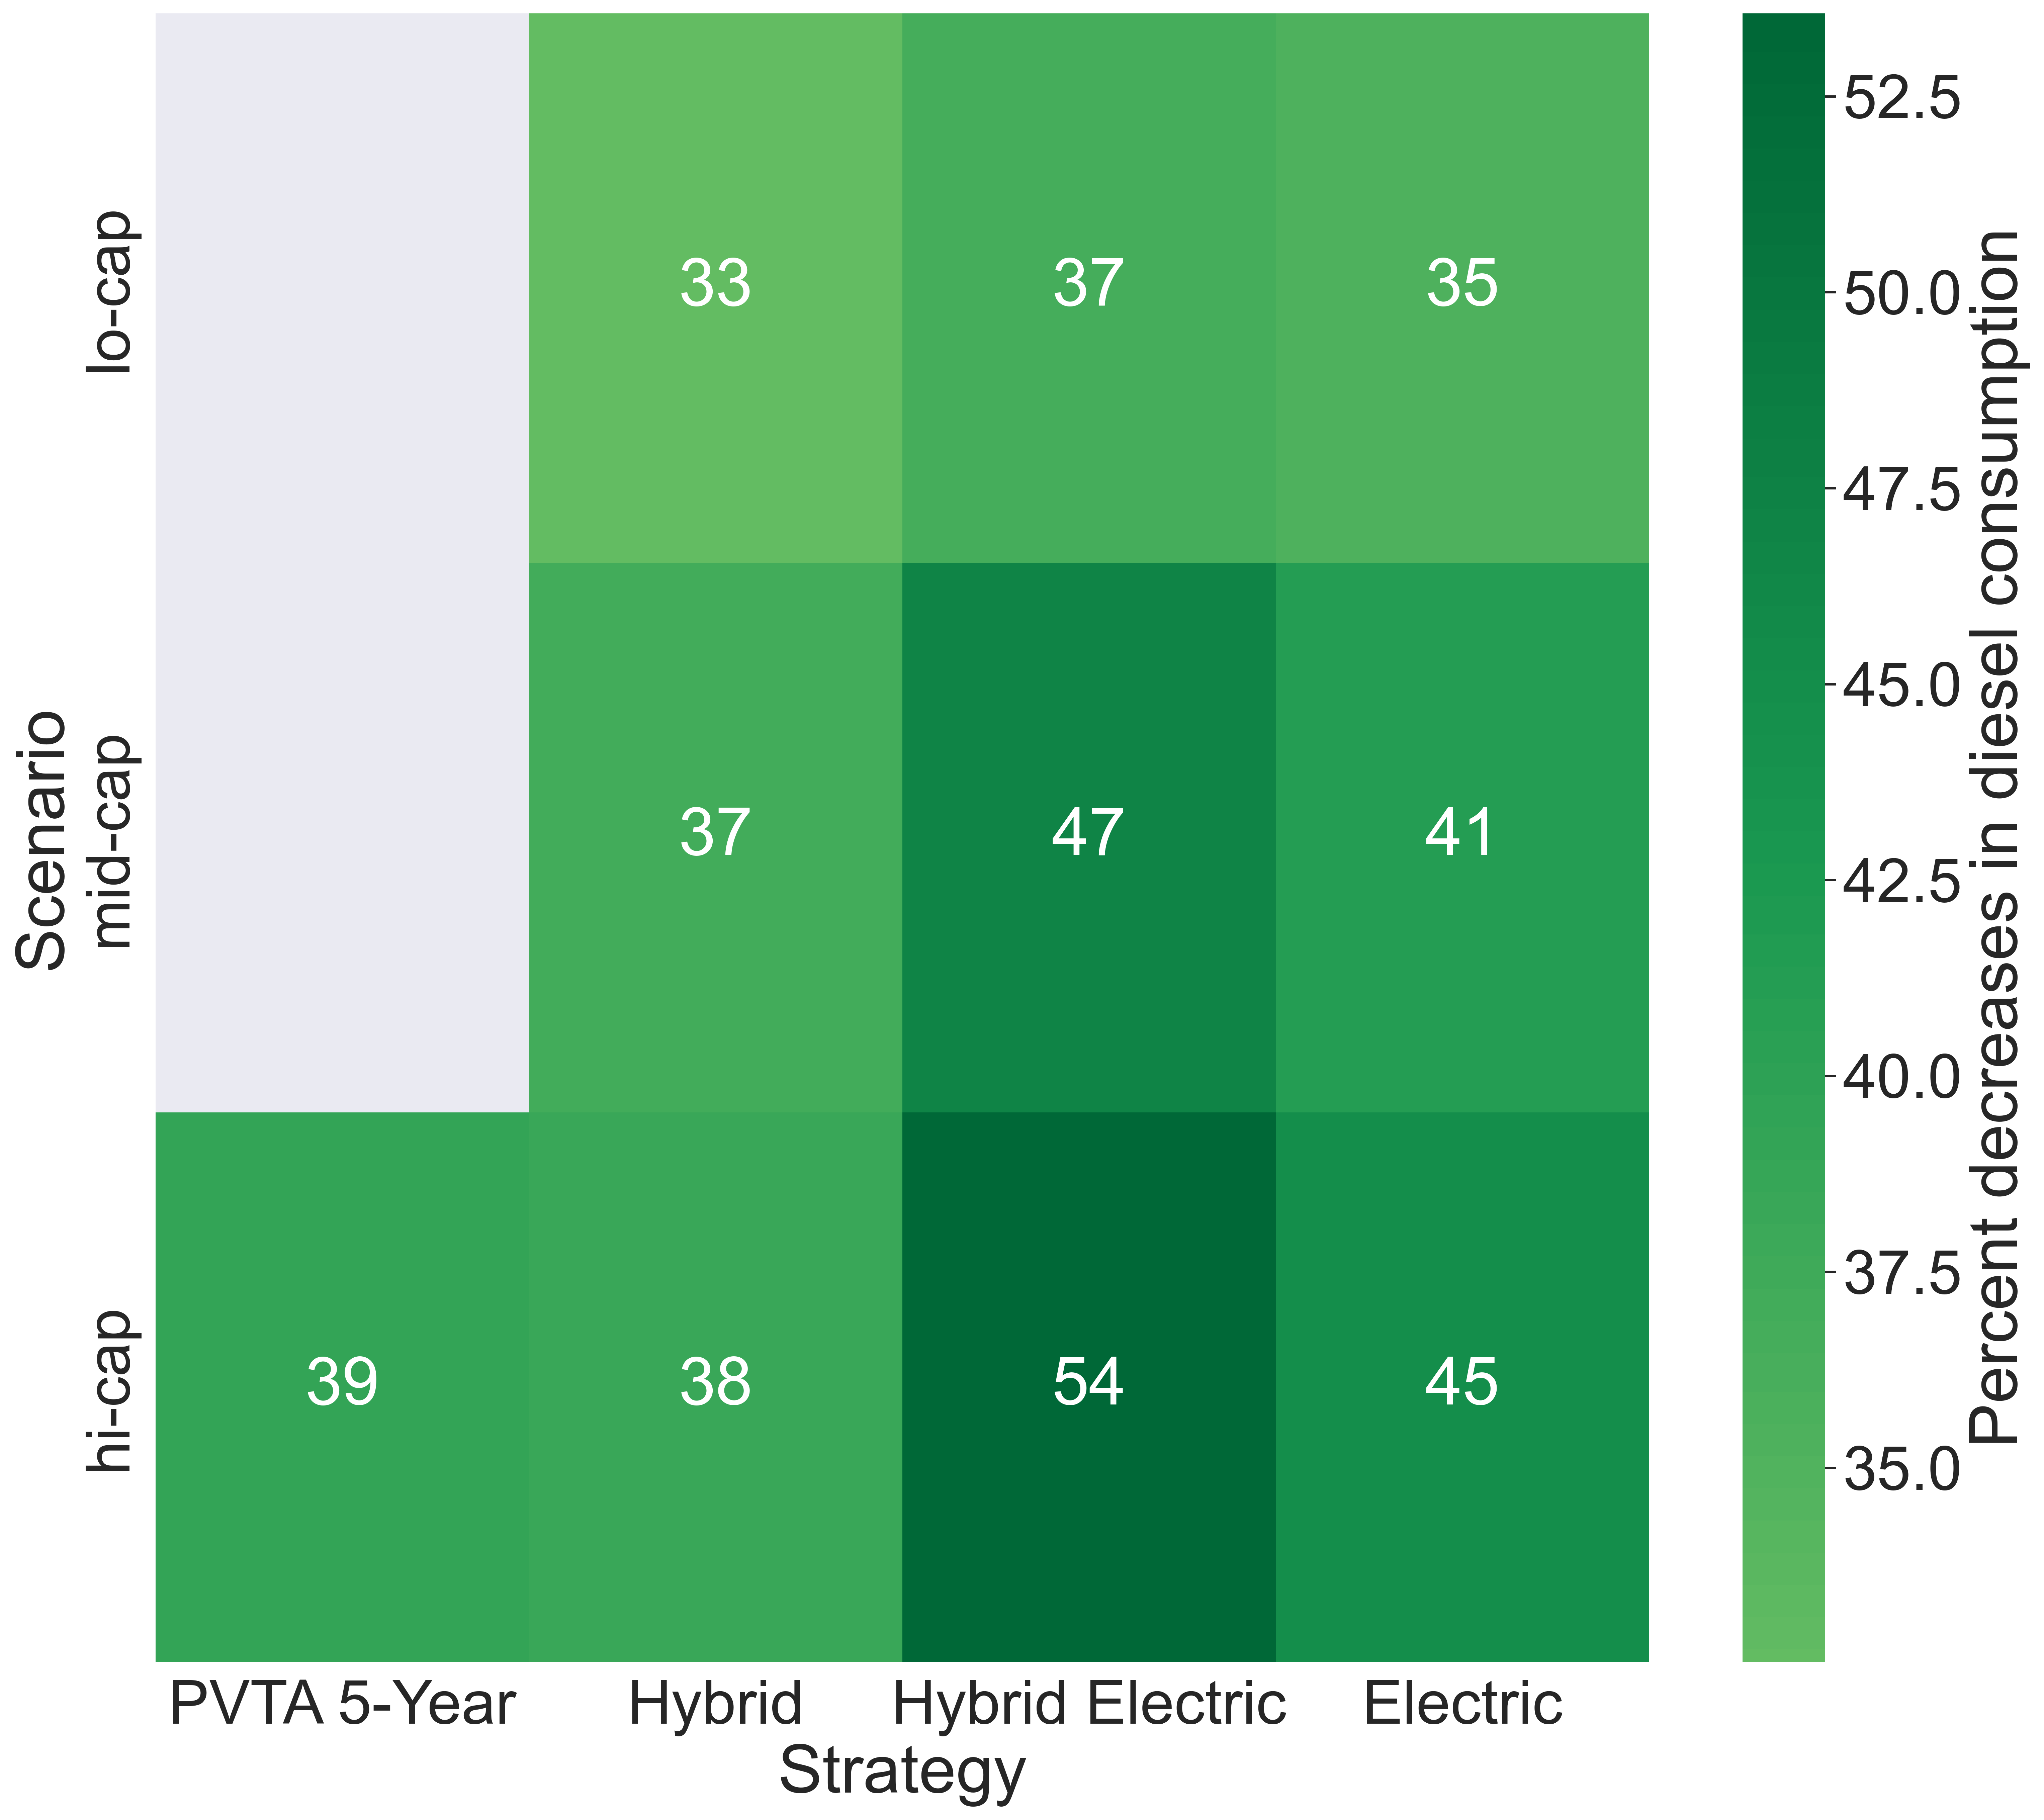

In [721]:
# Pivot dataframe to get desired structure
aggregated_df = final_df.groupby(['Scenario', 'Strategy'])['Result'].sum().reset_index().copy()

# Mapping for Scenario and Strategy columns
scenario_mapping = {
    'l': 'lo-cap',
    'm': 'mid-cap',
    'h': 'hi-cap',
    'c': 'c'   
}

strategy_mapping = {
    'SQ': 'Do-Nothing',
    'PP': 'PVTA 5-Year',
    'FH': 'Hybrid',
    'BM': 'Hybrid Electric',
    'FE': 'Electric'
}

# Replace values in the columns
aggregated_df['Scenario'] = aggregated_df['Scenario'].replace(scenario_mapping)
aggregated_df['Strategy'] = aggregated_df['Strategy'].replace(strategy_mapping)

pivot_df = aggregated_df.pivot('Scenario', 'Strategy', 'Result')

column_order = ['Do-Nothing', 'PVTA 5-Year', 'Hybrid', 'Hybrid Electric', 'Electric']
pivot_df = pivot_df[column_order]


# Compute %Decrease
reference_value = pivot_df.loc['c', 'Do-Nothing']

pivot_df = ((reference_value - pivot_df ) / reference_value) * 100

# Drop Scenario 'c' and Strategy 'Do-Nothing'
pivot_df = pivot_df.drop('c', axis=0)
pivot_df = pivot_df.drop('Do-Nothing', axis=1)

# Find min and max percentage decrease values
vmin_value, vmax_value = pivot_df.min().min(), pivot_df.max().max()

# Define the desired order for the y-axis
y_axis_order = ['lo-cap', 'mid-cap', 'hi-cap']

# Manually reorder the rows of the DataFrame based on the desired order
pivot_df = pivot_df.loc[y_axis_order]

# Plot heatmap
plt.figure(figsize=(18, 16), dpi=400)
sns.set(font_scale=3)
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='RdYlGn', cbar_kws={'label': 'Percent decreases in diesel consumption'}, center=0, vmin=vmin_value, vmax=vmax_value)

#plt.title("Percentage Decrease Heatmap based on Scenario and Strategy")
plt.savefig(r'../../figures/decrease-diesel-heatmap.png', dpi=400)  

plt.show()


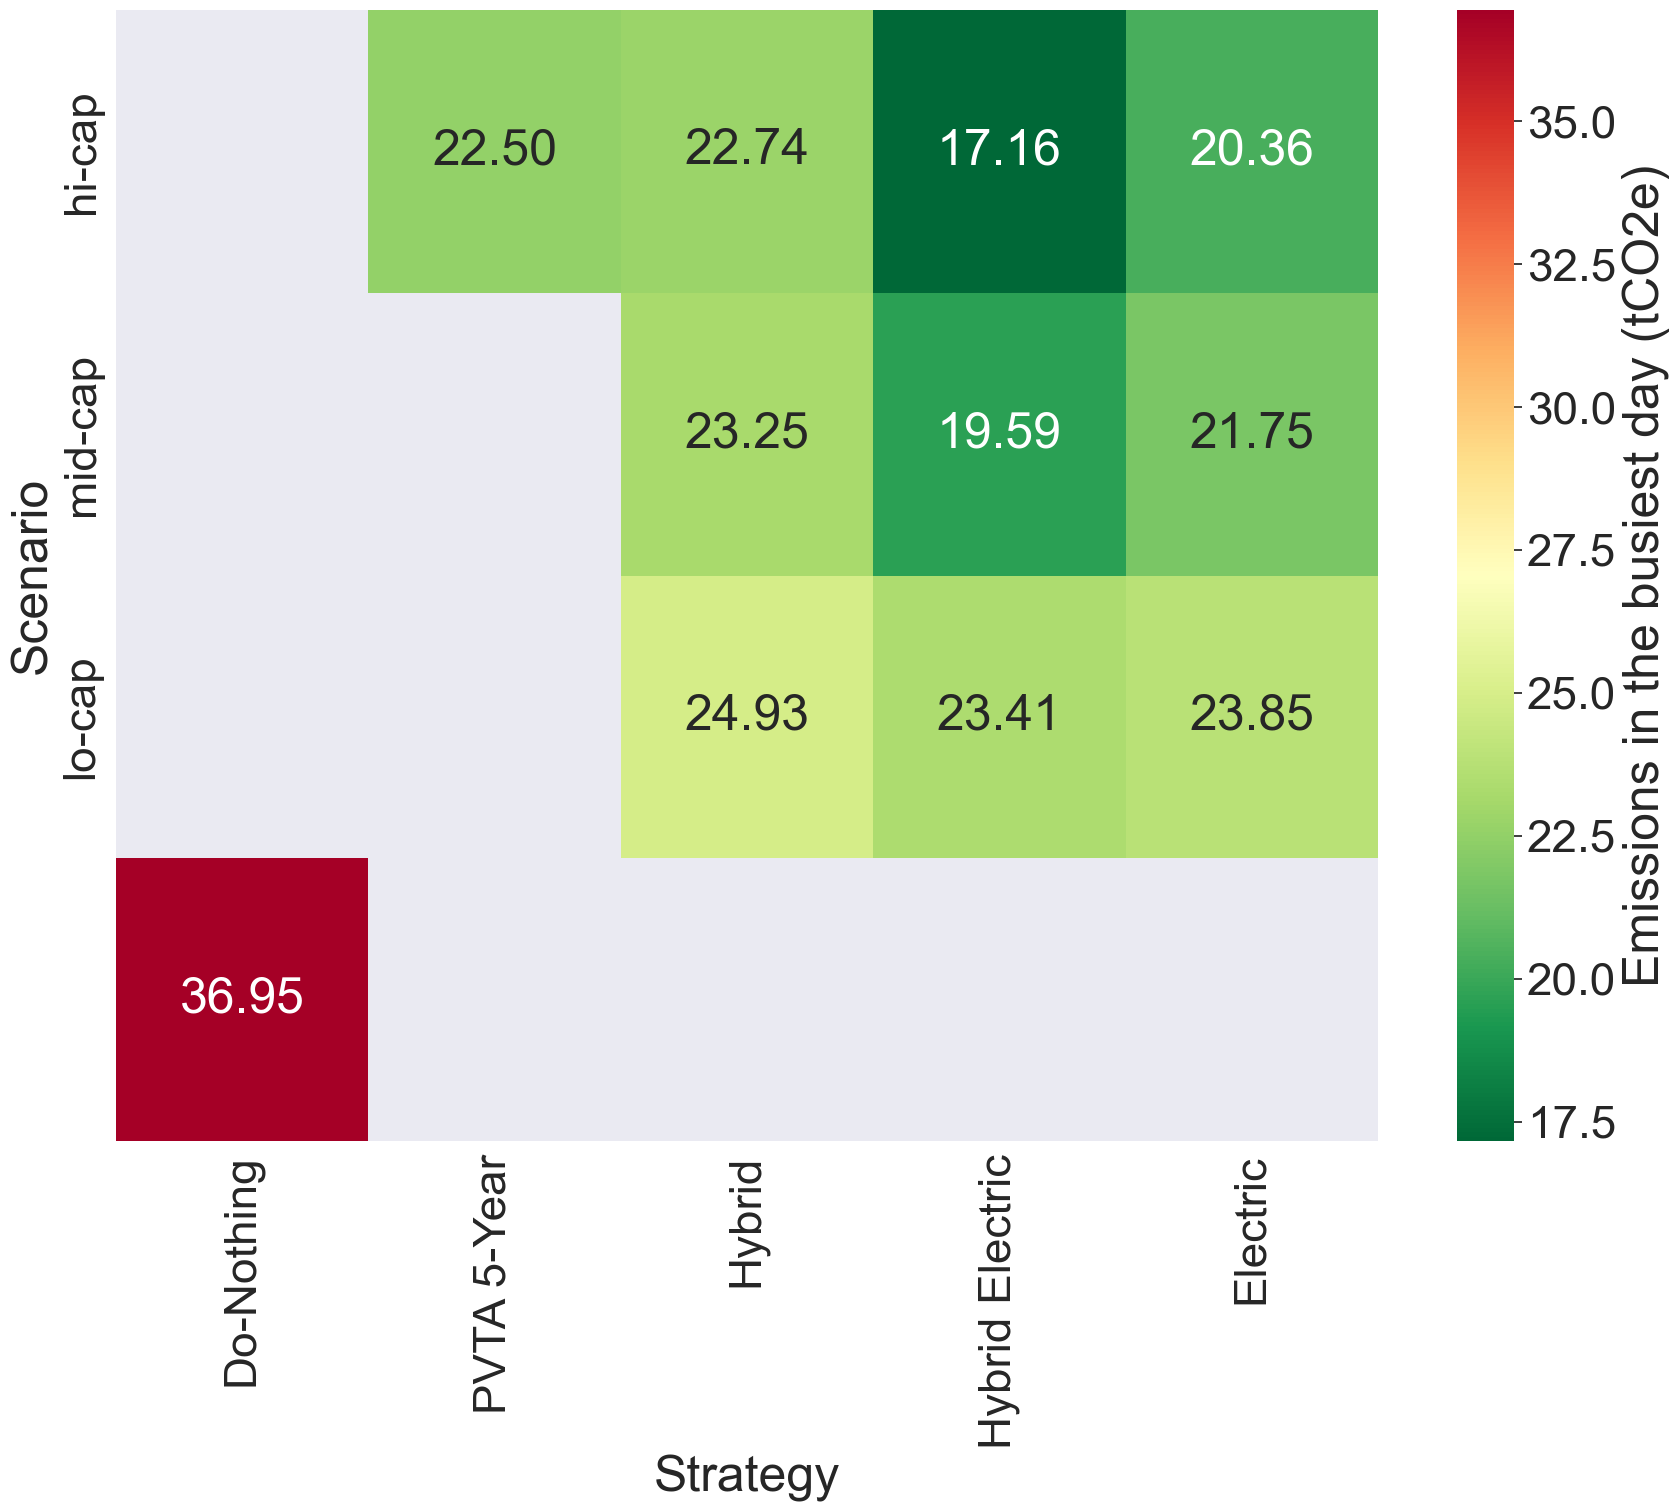

In [722]:
# Improve the plot
df_emission = final_df.copy()

# Mapping for Scenario and Strategy columns
scenario_mapping = {
    'l': 'lo-cap',
    'm': 'mid-cap',
    'h': 'hi-cap',
    'c': '',
}

strategy_mapping = {
    'SQ': 'Do-Nothing',
    'PP': 'PVTA 5-Year',
    'FH': 'Hybrid',
    'BM': 'Hybrid Electric',
    'FE': 'Electric'
}

# Replace values in the columns
df_emission['Scenario'] = df_emission['Scenario'].replace(scenario_mapping)
df_emission['Strategy'] = df_emission['Strategy'].replace(strategy_mapping)

pivot_df_emission = df_emission.pivot_table(values='CO2', index='Scenario', columns='Strategy', aggfunc='mean')

# Reorder the columns of pivot_df_emission
column_order = ['Do-Nothing', 'PVTA 5-Year', 'Hybrid', 'Hybrid Electric', 'Electric']
pivot_df_emission = pivot_df_emission[column_order]

# Define the desired order for the y-axis
y_axis_order = ['hi-cap','mid-cap','lo-cap','']

# Manually reorder the rows of the DataFrame based on the desired order
pivot_df_emission = pivot_df_emission.loc[y_axis_order]

vmin_value = pivot_df_emission.min().min()
vmax_value = pivot_df_emission.max().max()

# Set the aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(18, 16))

# Create heatmap
sns.set(font_scale=3)
sns.heatmap(pivot_df_emission, annot=True, fmt='.2f', cmap='RdYlGn_r', cbar_kws={'label': 'Emissions in the busiest day (tCO2e)'}, vmin=vmin_value, vmax=vmax_value)

# Add titles and labels
# Uncomment these lines if you want to include titles and labels
#plt.title('CO2 Emission Heatmap', fontsize=20)
#plt.xlabel('Strategy', fontsize=40)
#plt.ylabel('Scenario', fontsize=40)
#plt.xticks(fontsize=32, rotation=45)
#plt.yticks(fontsize=32)

# Save the plot
plt.tight_layout()
plt.savefig(r'../../figures/co2-emission-heatmap.png', dpi=400)

# Display the plot
plt.show()


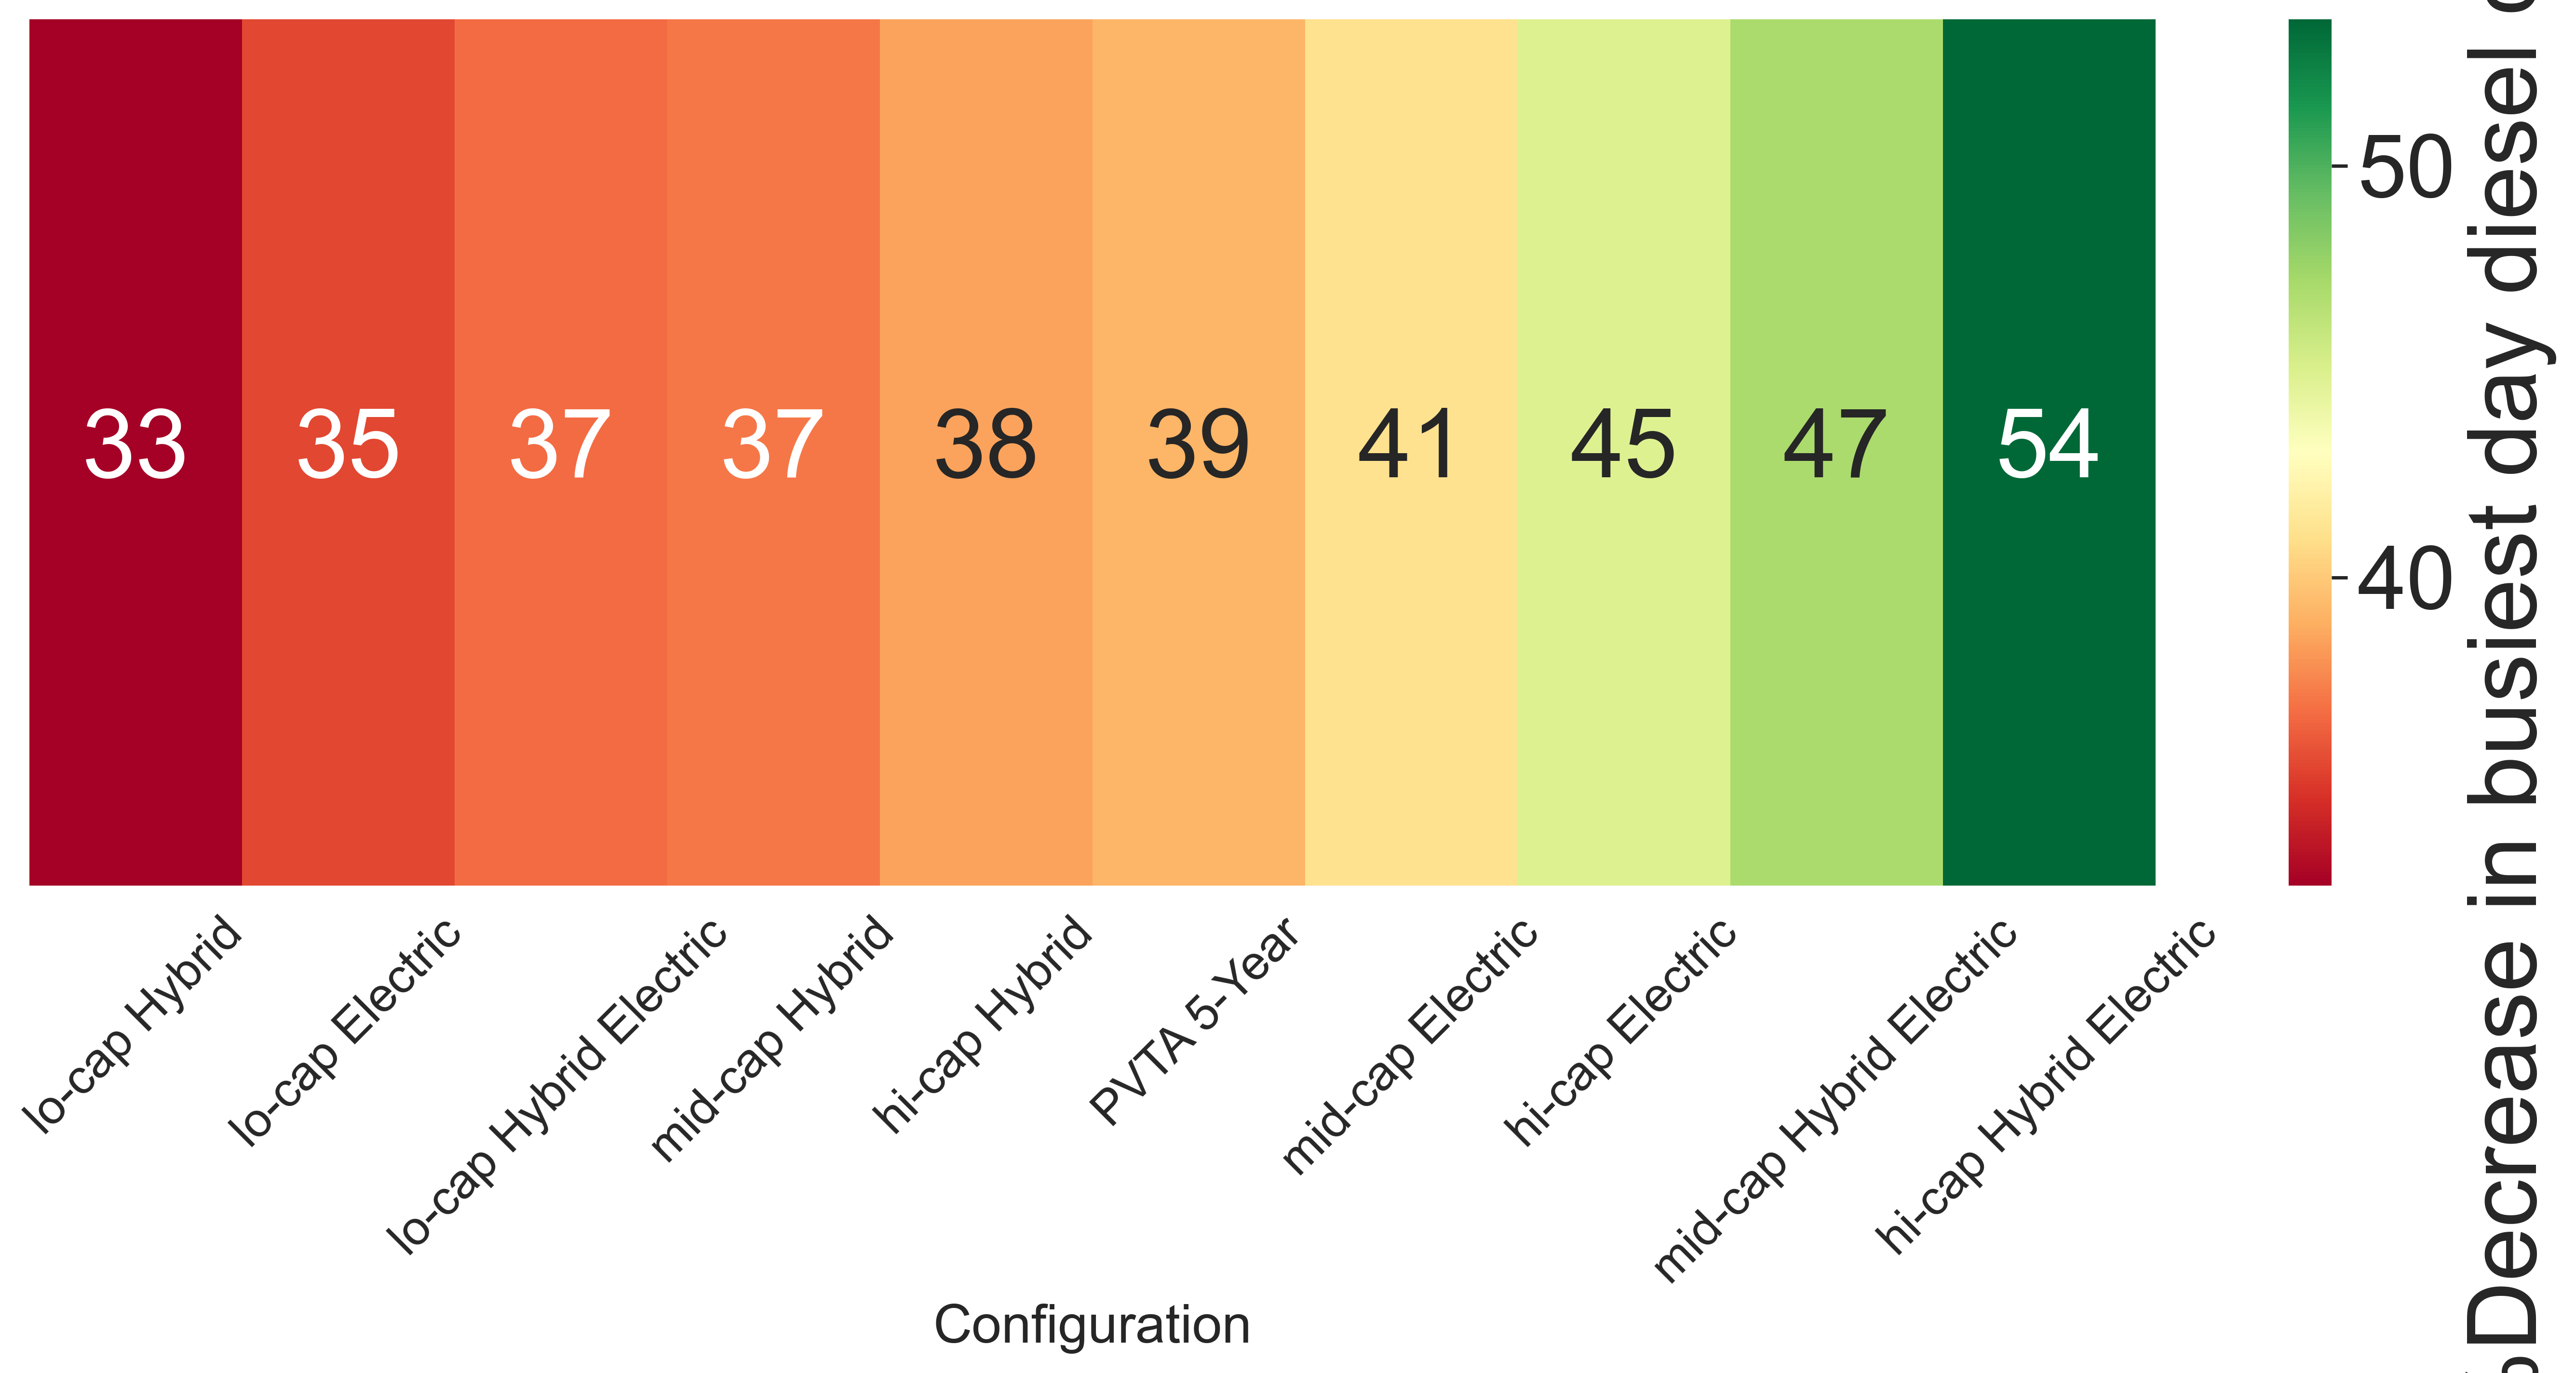

In [723]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the "Do-Nothing" configuration
mean_results = mean_results[mean_results['Label'] != 'Do-Nothing']

# Sort the data by % Decrease
mean_results = mean_results.sort_values(by='% Decrease')

# Convert DataFrame to a 2D array suitable for a heatmap
heatmap_data = mean_results.set_index('Label')['% Decrease'].T.values.reshape(1, -1)

plt.figure(figsize=(15, 8), dpi=400)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="RdYlGn", cbar_kws={'label': '%Decrease in busiest day diesel consumption'}, xticklabels=mean_results['Label'].tolist())

# Styling
plt.xticks(fontsize=18, rotation=45)
plt.yticks([])  # Hide the y-axis as it's not needed here
plt.xlabel('Configuration', fontsize=20)
#plt.title('% Decrease compared to Do-Nothing across configurations', fontsize=22)

plt.tight_layout()
plt.savefig(r'../../figures/relative-decrease-heatmap.png', dpi=400)
plt.show()


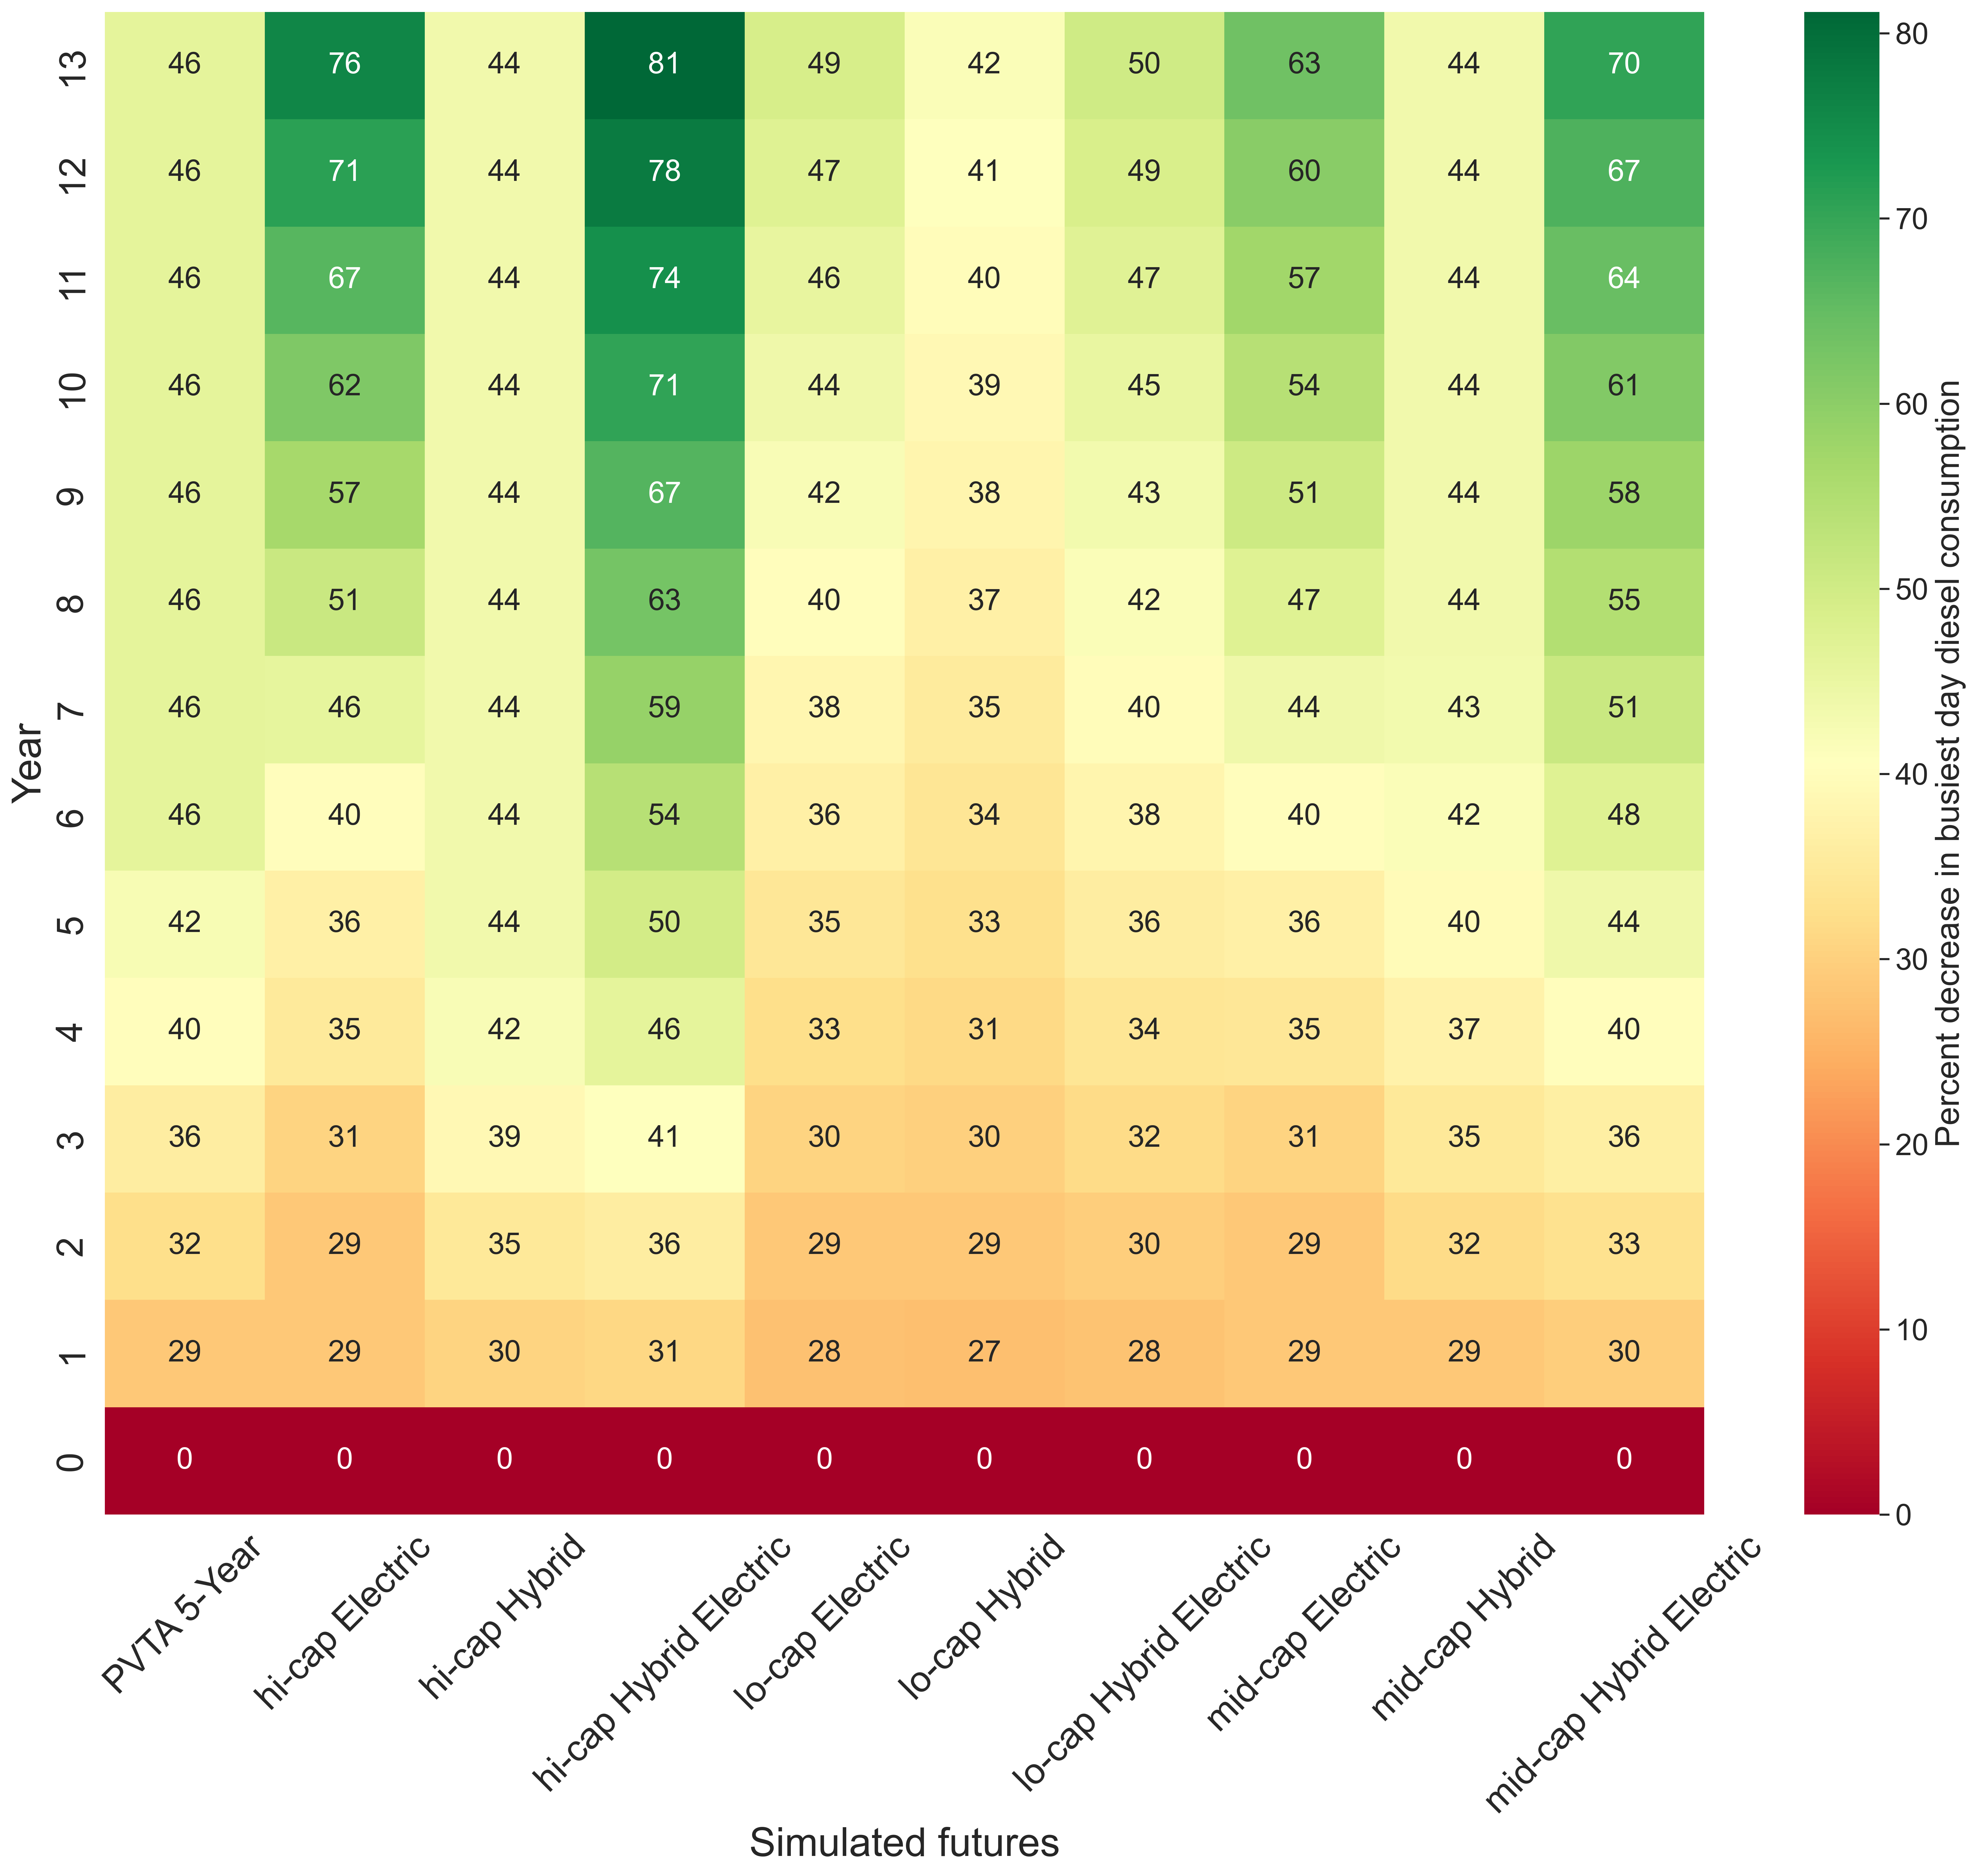

In [724]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate % decrease relative to 'Do-Nothing' for each Year
do_nothing_values = final_df[final_df['Label'] == 'Do-Nothing'].set_index('Year')['Result'].to_dict()
final_df['% Decrease'] = final_df.apply(lambda row: 100 * (do_nothing_values[row['Year']] - row['Result']) / do_nothing_values[row['Year']], axis=1)
#print(final_df['Label'])

future_mapping = {
    'Current Plan': 'PVTA 5-Year',
    'hi-cap Balanced Mix': 'hi-cap Hybrid Electric',
    'hi-cap Electric': 'hi-cap Electric',
    'hi-cap Hybrid': 'hi-cap Hybrid',
    'lo-cap Balanced Mix': 'lo-cap Hybrid Electric',
    'lo-cap Electric': 'lo-cap Electric',
    'lo-cap Hybrid': 'lo-cap Hybrid',    
    'mid-cap Balanced Mix': 'mid-cap Hybrid Electric',
    'mid-cap Electric': 'mid-cap Electric',
    'mid-cap Hybrid': 'mid-cap Hybrid',
}

# Replace values in the columns
final_df['Label'] = final_df['Label'].replace(future_mapping)

#print(final_df['Label'])


# Remove Do-Nothing rows from the data as it will have a 0% decrease 
final_df = final_df[final_df['Label'] != 'Do-Nothing']

# Pivot data for heatmap
sns.set(font_scale=1.5)
heatmap_data = final_df.pivot_table(index='Year', columns='Label', values='% Decrease')

plt.figure(figsize=(18, 16), dpi=400)

# Create the heatmap and store the returned axis in `ax`.
ax = sns.heatmap(heatmap_data, cmap="RdYlGn", annot=True, cbar_kws={'label': 'Percent decrease in busiest day diesel consumption'})

# Reverse the y-axis
ax.invert_yaxis()

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Adjusting the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.figure.subplots_adjust(right=0.8)
cbar.ax.set_ylabel('Percent decrease in busiest day diesel consumption', size=20)
cbar.ax.tick_params(labelsize=18)

# Styling
plt.xlabel('Simulated futures', fontsize=24)
plt.ylabel('Year', fontsize=24)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
plt.savefig(r'../../figures/yearly-relative-decrease-heatmap.png', dpi=400)
plt.show()


In [642]:
### Prepare route-based diesel consumption for SQ and hi-cap BM

In [643]:
H_BM_energy = pd.read_csv(r'../../results/highcap-BM-energy-by-routes.csv', low_memory=False)

In [644]:
H_BM_energy = H_BM_energy.loc[H_BM_energy['Year']==12].copy()

In [645]:
H_BM_energy = H_BM_energy.loc[H_BM_energy['Value']==1].copy()

In [646]:
H_BM_energy = H_BM_energy.groupby('Route')[['Coefficient','dist']].sum().reset_index()

In [647]:
H_BM_energy = H_BM_energy.rename(columns={'Coefficient': 'Diesel'})

In [648]:
H_BM_energy['Diesel_per_mile']=H_BM_energy['Diesel']/H_BM_energy['dist']

In [649]:
H_BM_energy.to_csv(r'../../results/highcap-balanced-mix-diesel.csv', index=False)

In [650]:
SQ_filtered['Diesel'] = np.where(SQ_filtered['Powertrain'] != 'electric', SQ_filtered['Energy'], 0)

In [651]:
SQ_filtered = SQ_filtered.groupby('Route')[['Diesel','dist']].sum().reset_index()

In [652]:
SQ_filtered['Diesel_per_mile']=SQ_filtered['Diesel']/SQ_filtered['dist']

In [653]:
SQ_filtered.to_csv(r'../../results/do-nothing-diesel.csv', index=False)

In [654]:
PP_energy = pd.read_csv(r'../../results/highcap-PP-optimized-variables-aggregated.csv', low_memory=False)

In [655]:
PP_energy = PP_energy.loc[PP_energy['Year']==12].copy()

In [656]:
PP_energy = PP_energy.loc[PP_energy['Value']==1].copy()

In [657]:
PP_energy = PP_energy.groupby('Route')[['Coefficient','dist']].sum().reset_index()

In [658]:
PP_energy = PP_energy.rename(columns={'Coefficient': 'Diesel'})

In [659]:
PP_energy['Diesel_per_mile']=PP_energy['Diesel']/PP_energy['dist']

In [660]:
PP_energy.to_csv(r'../../results/pp-diesel.csv', index=False)

In [661]:
H_FE_energy = pd.read_csv(r'../../results/highcap-FE-optimized-variables-aggregated.csv', low_memory=False)

In [662]:
H_FE_energy = H_FE_energy.loc[H_FE_energy['Year']==12].copy()

In [663]:
H_FE_energy = H_FE_energy.loc[H_FE_energy['Value']==1].copy()

In [664]:
H_FE_energy = H_FE_energy.groupby('Route')[['Coefficient','dist']].sum().reset_index()

In [665]:
H_FE_energy = H_FE_energy.rename(columns={'Coefficient': 'Diesel'})

In [666]:
H_FE_energy['Diesel_per_mile']=H_FE_energy['Diesel']/H_FE_energy['dist']

In [667]:
H_FE_energy.to_csv(r'../../results/FE-diesel.csv', index=False)

In [668]:
H_BM_energy['Diesel'].sum()

341.481417981

In [669]:
SQ_filtered['Diesel'].sum()

3754.3190736247534

In [670]:
PP_energy['Diesel'].sum()

2028.4858373730003

In [671]:
### Prepare data for cost analysis

In [672]:
initial_values = {
    'HEB': 9,
    'BEB': 15
}

In [673]:
h_pp = pd.read_csv(r'../../results/highcap-PP-optimized-variables-y.csv', low_memory=False)

# Drop CDBs
h_pp = h_pp.loc[h_pp['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
h_pp['Diff'] = h_pp.groupby('Powertrain')['Value'].diff().fillna(h_pp['Value'] - h_pp['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
h_pp['Investment Cost (M$)'] = h_pp.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)


In [674]:
h_FE = pd.read_csv(r'../../results/highcap-FE-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
h_FE = h_FE.loc[h_FE['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
h_FE['Diff'] = h_FE.groupby('Powertrain')['Value'].diff().fillna(h_FE['Value'] - h_FE['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
h_FE['Investment Cost (M$)'] = h_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [675]:
m_FE = pd.read_csv(r'../../results/midcap-FE-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
m_FE = m_FE.loc[m_FE['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
m_FE['Diff'] = m_FE.groupby('Powertrain')['Value'].diff().fillna(m_FE['Value'] - m_FE['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
m_FE['Investment Cost (M$)'] = m_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [676]:
l_FE = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
l_FE = l_FE.loc[l_FE['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
l_FE['Diff'] = l_FE.groupby('Powertrain')['Value'].diff().fillna(l_FE['Value'] - l_FE['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
l_FE['Investment Cost (M$)'] = l_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [677]:
h_FH = pd.read_csv(r'../../results/highcap-FH-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
h_FH = h_FH.loc[h_FH['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
h_FH['Diff'] = h_FH.groupby('Powertrain')['Value'].diff().fillna(h_FH['Value'] - h_FH['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
h_FH['Investment Cost (M$)'] = h_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [678]:
m_FH = pd.read_csv(r'../../results/midcap-FH-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
m_FH = m_FH.loc[m_FH['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
m_FH['Diff'] = m_FH.groupby('Powertrain')['Value'].diff().fillna(m_FH['Value'] - m_FH['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
m_FH['Investment Cost (M$)'] = m_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [679]:
l_FH = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
l_FH = h_pp.loc[l_FH['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
l_FH['Diff'] = l_FH.groupby('Powertrain')['Value'].diff().fillna(l_FH['Value'] - l_FH['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
l_FH['Investment Cost (M$)'] = l_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [680]:
h_BM = pd.read_csv(r'../../results/highcap-BM-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
h_BM = h_BM.loc[h_BM['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
h_BM['Diff'] = h_BM.groupby('Powertrain')['Value'].diff().fillna(h_BM['Value'] - h_BM['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
h_BM['Investment Cost (M$)'] = h_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [681]:
m_BM = pd.read_csv(r'../../results/midcap-BM-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
m_BM = m_BM.loc[m_BM['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
m_BM['Diff'] = m_BM.groupby('Powertrain')['Value'].diff().fillna(m_BM['Value'] - m_BM['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
m_BM['Investment Cost (M$)'] = m_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [682]:
l_BM = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-y.csv', low_memory=False)
# Drop CDBs
l_BM = l_BM.loc[l_BM['Powertrain']!='CDB']

# Compute the difference in 'Value' column for each year compared to its previous year
l_BM['Diff'] = l_BM.groupby('Powertrain')['Value'].diff().fillna(l_BM['Value'] - l_BM['Powertrain'].map(initial_values))

# Calculate the investment cost for the additional fleet
l_BM['Investment Cost (M$)'] = l_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

In [683]:
# Plotting with Seaborn
future_mapping = {
    'Hi-cap balanced mix': 'hi-cap Balanced Mix',
    'Hi-cap electric': 'hi-cap Electric',
    'Hi-cap hybrid': 'hi-cap Hybrid',
    'Lo-cap balanced mix': 'lo-cap Balanced Mix',
    'Lo-cap electric': 'lo-cap Electric',
    'Lo-cap hybrid': 'lo-cap Hybrid',    
    'Mid-cap balanced mix': 'mid-cap Balanced Mix',
    'Mid-cap electric': 'mid-cap Electric',
    'Mid-cap hybrid': 'mid-cap Hybrid',
    'Purchase plan': 'Current Plan',
}

# Replace values in the columns
grouped_df['Config'] = grouped_df['Config'].replace(future_mapping)


plt.figure(figsize=(12,8), dpi=400)

# Using the "deep" color palette from Seaborn which has 10 distinct colors
#sns.set_palette("deep")

# Improve the plot
sns.set_style("whitegrid")
sns.set_context("talk")  # makes everything larger

sns.lineplot(data=grouped_df, x='Year', y='Investment Cost (M$)', hue='Config', lw=2)

plt.xlabel('Year', fontsize=26)
plt.ylabel('Investment cost (M USD)', fontsize=26)
#plt.title('Total Yearly Investment Cost for Each Configuration', fontsize=16)

# Move the legend to the right outside of the plot
plt.legend(title='Simulated futures', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=22, title_fontsize='24')

plt.yticks(fontsize=22)
plt.yticks(fontsize=22)


plt.grid(True)
sns.despine(left=True, bottom=True)

plt.tight_layout()

# Save the figure before showing it
plt.savefig(r'../../figures/investment_cost_plot.png', bbox_inches='tight', dpi=400)  


plt.show()


NameError: name 'grouped_df' is not defined

In [725]:
fleet = pd.read_excel(r'../../results/fleet-composition.xlsx', engine='openpyxl')

In [726]:
fleet

future  Year  CDB  HEB  BEB  total_fleet  electrification
0         Do-Nothing     0  189    9   15          213         0.070423
1         Do-Nothing     1  189    9   15          213         0.070423
2         Do-Nothing     2  189    9   15          213         0.070423
3         Do-Nothing     3  189    9   15          213         0.070423
4         Do-Nothing     4  189    9   15          213         0.070423
..               ...   ...  ...  ...  ...          ...              ...
149  hi-cap Electric     9   87    9  100          196         0.510204
150  hi-cap Electric    10   78    9  116          203         0.571429
151  hi-cap Electric    11   69    9  132          210         0.628571
152  hi-cap Electric    12   61    9  148          218         0.678899
153  hi-cap Electric    13   52    9  164          225         0.728889

[154 rows x 7 columns]

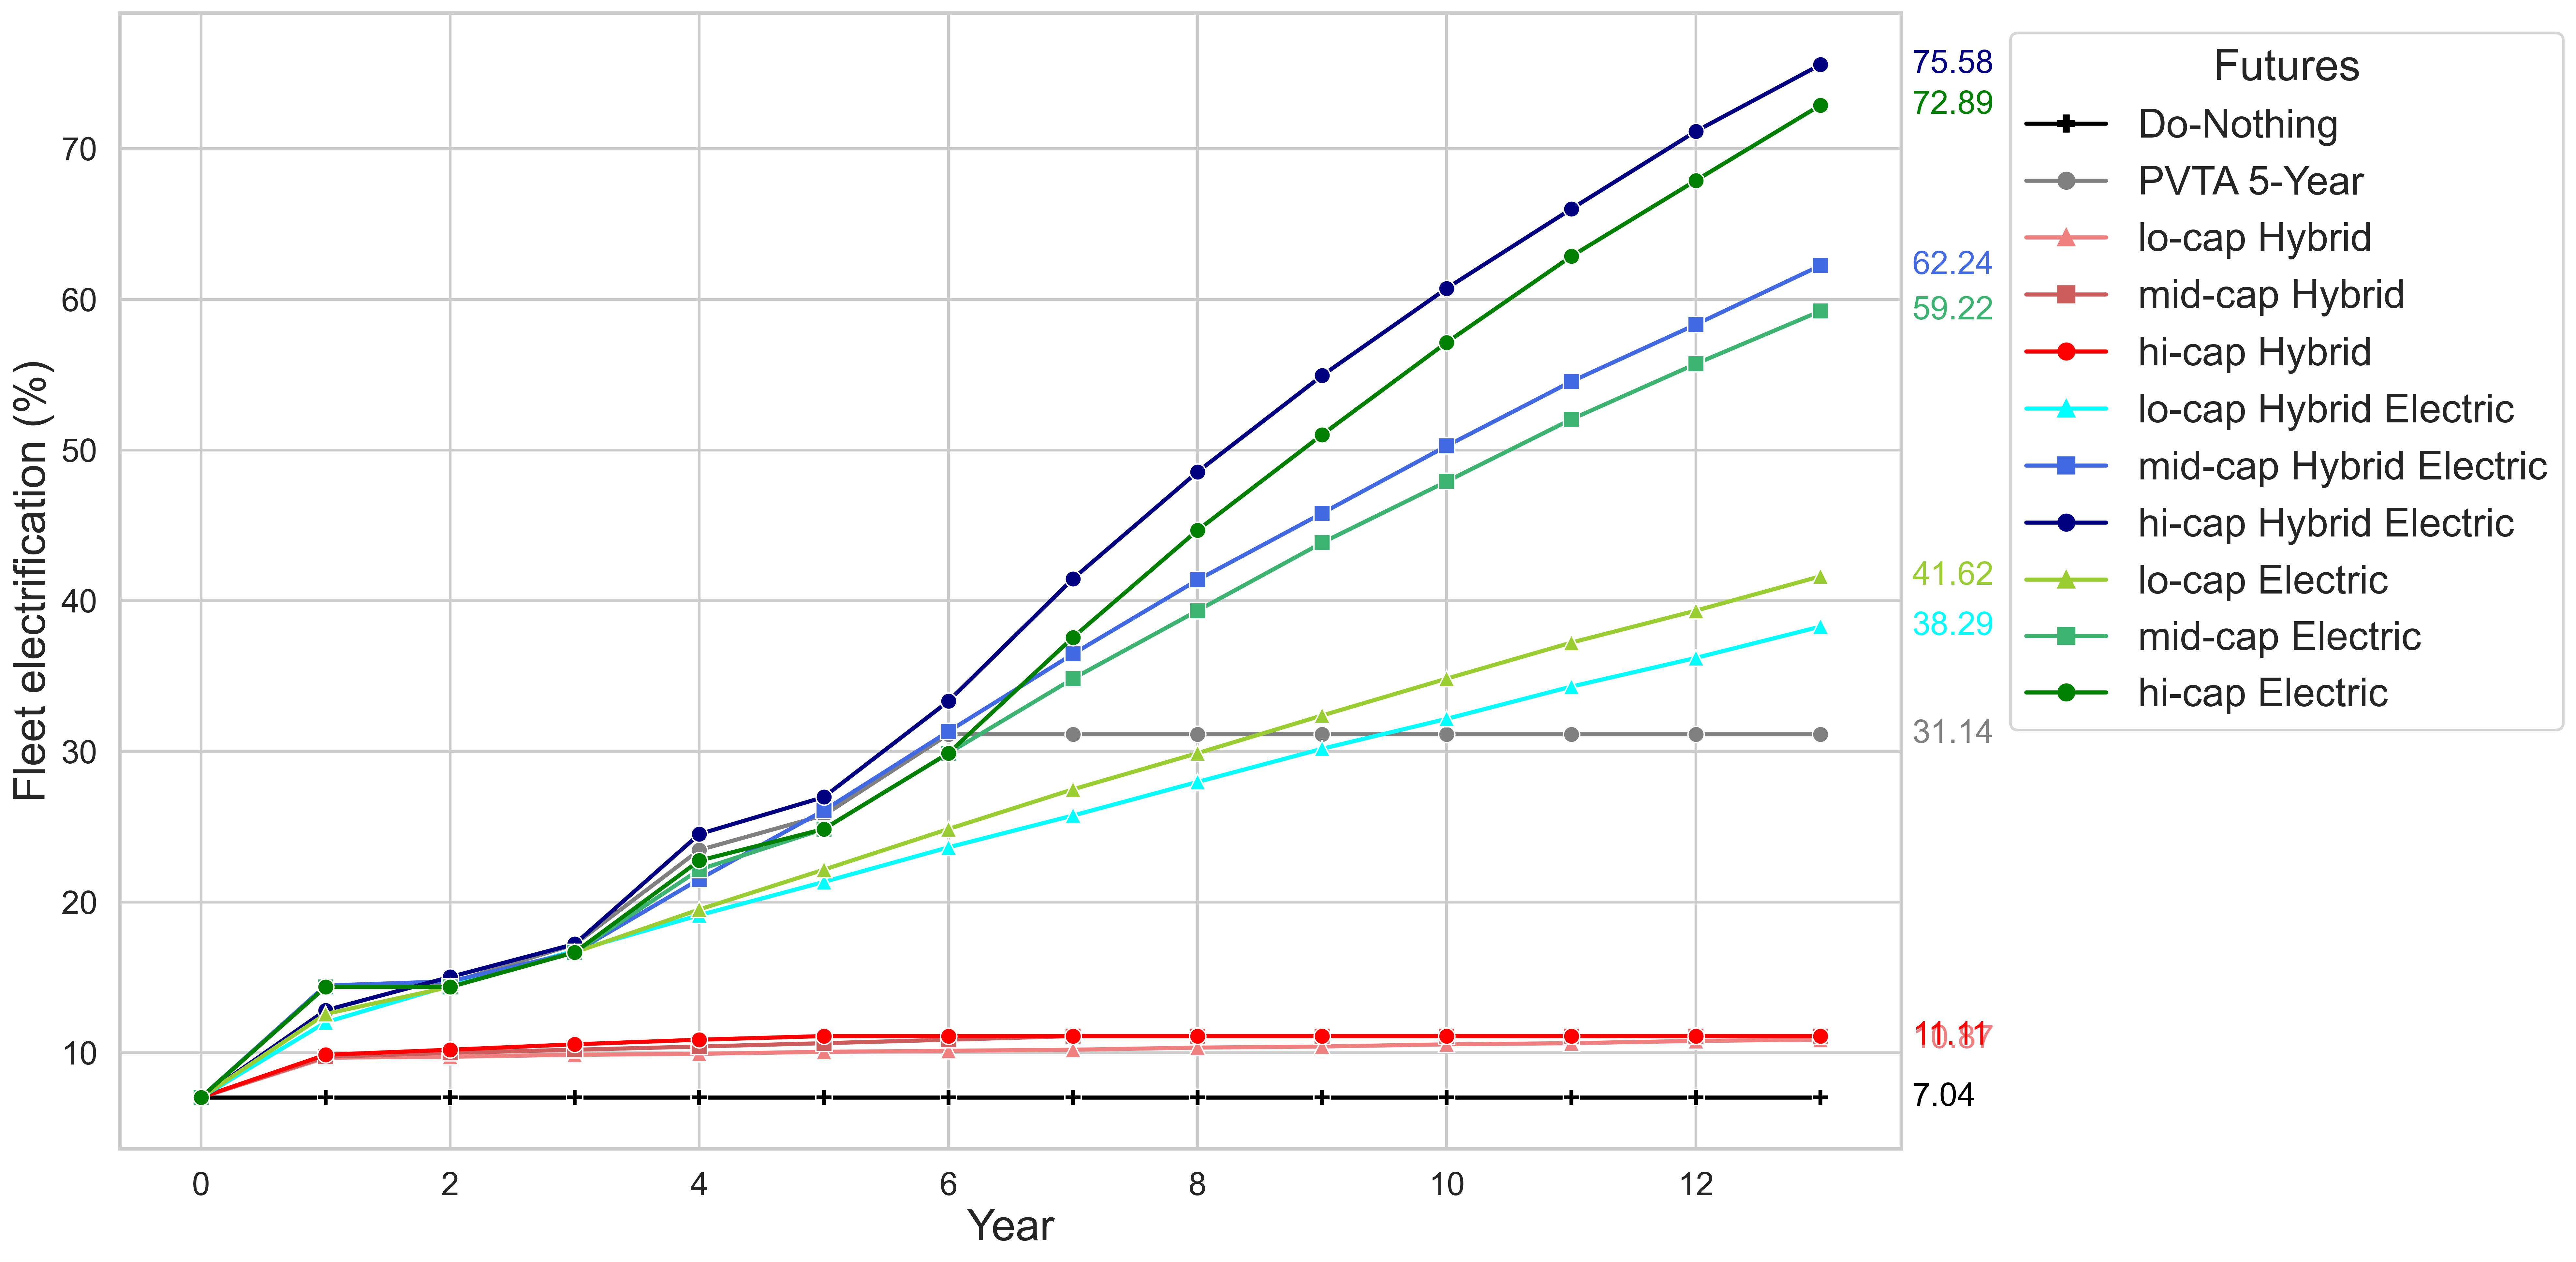

In [735]:
# Set the style to whitegrid
sns.set_style("whitegrid")

# Adjust the size of the plot
plt.figure(figsize=(15,10), dpi=400)

# Define a custom palette and marker order
custom_palette = {
    "Do-Nothing": "black",
    "PVTA 5-Year": "grey",
    "lo-cap Hybrid": "lightcoral",
    "mid-cap Hybrid": "indianred",
    "hi-cap Hybrid": "red",
    "lo-cap Hybrid Electric": "aqua",
    "mid-cap Hybrid Electric": "royalblue",
    "hi-cap Hybrid Electric": "navy",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}
custom_markers = {
    "Do-Nothing": "P",
    "PVTA 5-Year": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}

# Get the markers in the same order as the unique values in the 'future' column
markers_order = [custom_markers[future] for future in fleet['future'].unique()]

plot = sns.lineplot(data=fleet, x='Year', y=fleet['electrification']*100, hue='future',
                    palette=custom_palette, markers=markers_order, dashes=False, style='future')

plt.ylabel('Fleet electrification (%)', fontsize=24)
plt.xlabel('Year', fontsize=24)
#plt.title('Electrification Percentage Over Years')
plt.grid(True, which="both")
plt.tight_layout()

# Move the legend outside the plot on the right side
plt.legend(title='Futures', title_fontsize='24', fontsize=22, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Annotate with the final number of the final year on each line
for line, name in zip(plot.lines, fleet['future'].unique()):
    y = line.get_ydata()[-1]
    plt.annotate(f'{y:.2f}', xy=(1, y), xytext=(6, 0), color=line.get_color(),
                 xycoords = plot.get_yaxis_transform(), textcoords="offset points",
                 size=18, va="center")

# Save the figure with high resolution
plt.savefig(r'../../figures/Electrification_Percentage_Over_Years.png', dpi=400, bbox_inches='tight')

plt.show()
